<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

##   1.Problem Statement & Business Objective

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

##### This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected.
##### Identification of such applicants using EDA is the aim of this case study.   In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

##   2. Setting Up Jupyter Notebook

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [1]:
# Filtering warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Changing display settings

pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 3. Reading and Inspecting the Data Frame 

<p style="padding: 0.015px;
              color:white;">
</p>
</div>


In [6]:
# Reading the Dataframe

application_df=pd.read_csv("application_data.csv")

In [7]:
# Viewing the first five rows of the DataFrame

application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
# Viewing the last five rows of the DataFrame

application_df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.0000,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2

In [9]:
# Printing the shape(rows, columns) of the DataFrame

print(application_df.shape)

(307511, 122)


In [10]:
# Printing the information about the DataFrame

print(application_df.info(null_counts=True,verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [11]:
# Statistical summary of the DataFrame

application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ###   Summary:
   - The data frame contains 121 features, 1 target variable and 307511 rows.  
   The data types of features are as follows:  
     a. 65 features are float64  
     b. 41 features are integer  
     c. 16 features are object
   - There are a lοt οf features with null values but datatypes οf these features lοοks fine.

<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 4. Missing Value Treatment

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [12]:
# Determining the percentage of Missing Values in the dataframe

nulls=(application_df.isnull().sum()/len(application_df)*100).sort_values(ascending = False)
nulls

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [13]:
# Filtering the features having percentage of null values greater than or equal to 40%

null40 = nulls[nulls.values>=40]
null40

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [14]:
# Number of features having percentage of null values greater than or equal to 40

null40.shape[0]

49

In [15]:
# Dropping features having percentage of null values greater than or equal to 40

application_df.drop(null40.index,axis=1,inplace=True)

In [16]:
# Checking the shape of the dataframe after dropping the features

application_df.shape

(307511, 73)

In [17]:
# Determining the percentage of Missing Values in the dataframe after dropping the features

(application_df.isnull().sum()/len(application_df)*100).sort_values(ascending = False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

In [18]:
# Analyzing "OCCUPATION_TYPE" for possible dropping/imputation of NaN values

application_df["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [19]:
# Imputing missing values of feature "OCCUPATION_TYPE" with "Unknown"
# Because inputing it with any existing catergory might influence the analysis

application_df['OCCUPATION_TYPE'].fillna('Unknown', inplace =True)

# Checking the category-wise count of feature "OCCUPATION_TYPE" after imputation

application_df['OCCUPATION_TYPE'].value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

<AxesSubplot:>

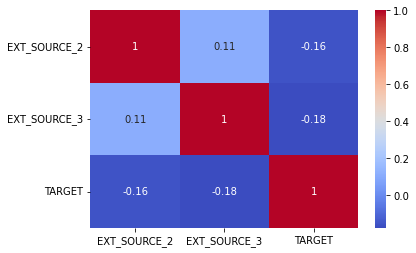

In [20]:
# Checking correlation of features EXT_SOURCE_2, EXT_SOURCE_3 and TARGET variable

sns.heatmap(application_df[["EXT_SOURCE_2", "EXT_SOURCE_3","TARGET"]].corr(),annot=True,cmap='coolwarm')

In [21]:
# Since there is no great correlation among the features EXT_SOURCE_2, EXT_SOURCE_3 and TARGET variable, we can drop them

application_df.drop(["EXT_SOURCE_2","EXT_SOURCE_3"],axis=1,inplace=True)

In [22]:
# Analyzing AMT_REQ_X features for the treatment of Null values

amt_req=[]

for col in application_df:
    if "AMT_REQ" in col:
        amt_req.append(col)

application_df[amt_req].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [23]:
#Imputing amt_req features with the "median" because columns represent number of enquiries made which cannot be decimal

for cols in amt_req:
     application_df[cols].fillna(application_df[cols].median(),inplace=True)

# Verification

application_df[amt_req].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [24]:
# Analysing NAME_TYPE_SUITE feature for dropping/imputation of NaN values

application_df["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [25]:
# Imputing NaN values of feature NAME_TYPE_SUITE with "Unknown" as there are significant numbers of null values.

application_df.NAME_TYPE_SUITE.fillna("Unknown",inplace=True)

# Verification

application_df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Unknown              1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [26]:
# Analysing SOCIAL_CIRCLE variables for possible dropping/removal of NaN values

social_circle=[]
for cols in application_df.columns:
    if "SOCIAL_CIRCLE" in cols:
        social_circle.append(cols)

application_df[social_circle].nunique()

OBS_30_CNT_SOCIAL_CIRCLE    33
DEF_30_CNT_SOCIAL_CIRCLE    10
OBS_60_CNT_SOCIAL_CIRCLE    33
DEF_60_CNT_SOCIAL_CIRCLE     9
dtype: int64

In [27]:
# Imputing the NaN values in SOCIAL_CIRCLE features(Categorical) with "Mode"


for cols in social_circle:
    application_df[cols].fillna(application_df[cols].mode()[0],inplace=True)

# Verification

application_df[social_circle].isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
dtype: int64

In [28]:
# Analyzing DAY_LAST_PHONE_CHANGE feature for possible dropping/imputation of NaN values

application_df.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [29]:
# Imputing the NaN value in DAYS_LAST_PHONE_CHANGE feature with "Mode"

application_df.DAYS_LAST_PHONE_CHANGE.fillna(application_df.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace=True)

#Verification

application_df.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

In [30]:
# Analysing AMT_GOODS_PRICE, AMT_ANNUITY and CNT_FAM_MEMBERS for deletion/imputation of NaN values

null_cols=["AMT_GOODS_PRICE","AMT_ANNUITY","CNT_FAM_MEMBERS"]
application_df[null_cols].describe()

,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS
count,3.072330e+05,307499.000000,307509.000000
mean,5.383962e+05,27108.573909,2.152665
std,3.694465e+05,14493.737315,0.910682
min,4.050000e+04,1615.500000,1.000000
25%,2.385000e+05,16524.000000,2.000000
50%,4.500000e+05,24903.000000,2.000000
75%,6.795000e+05,34596.000000,3.000000
max,4.050000e+06,258025.500000,20.000000


In [31]:
# Imputing the NaN values in features AMT_GOODS_PRICE, AMT_ANNUITY and CNT_FAM_MEMBERS with "Median" because of outliers

for col in null_cols:
    application_df[col].fillna(application_df[col].median(),inplace=True)

# Verification

application_df[null_cols].isnull().sum()

AMT_GOODS_PRICE    0
AMT_ANNUITY        0
CNT_FAM_MEMBERS    0
dtype: int64

In [32]:
# Shape of dataframe after treating the NaN values of all variables

application_df.shape

(307511, 71)

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ###   Summary:
   - There are 49 features with Null Value % more than 40%.
   - Most of the 49 features are related to different area sizes on apartment owned/rented by the loan applicant.
   - Dropped the 49 features having high Null Value % by setting a threshold of 40%.
   - Imputed the existing 31% Null values of feature "OCCUPATION_TYPE" with "Unknown" because inputing it with any existing  
     catergory might influence the analysis.
   - Features EXT_SOURCE_1 and EXT_SOURCE_3 had 56% and 20% of Null Values respectively, however, they did not show correlation 
     with the TARGET variable hence dropped.
   - Imputed the existing 13% Null Values in AMT_REQ_X features with the "Median" because they represent number of enquiries 
     made which cannot be decimal.
   - Imputed the Null Values of feature NAME_TYPE_SUITE with "Unknown".
   - Imputed marginal existent Null Values of SOCIAL_CIRCLE_X features and DAYS_LAST_PHONE_CHANGE with "Mode".
   - Imputed marginal existent Null Values of the features "AMT_GOODS_PRICE","AMT_ANNUITY","CNT_FAM_MEMBERS" with "Median" 
     due to the presence of outliers.
   - The final shape of the "application_data" dataset stands at <b>(307511, 71)</b> after dropping/imputing all the Null Values.
   
   
<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 5. Analyzing & Deleting Unnecessary Columns

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [33]:
# Checking information about the dataframe

application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

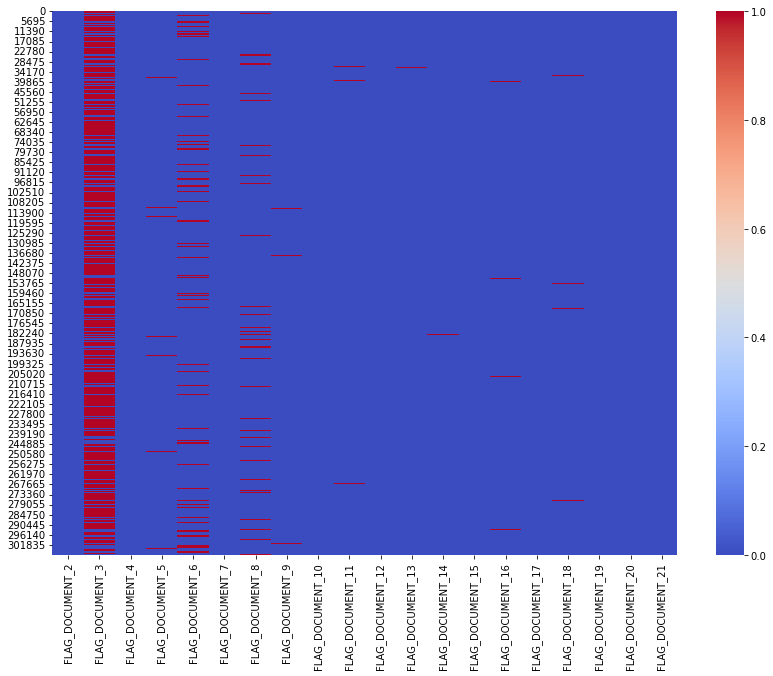

In [34]:
# Analysing the FLAG_DOCUMENT_X columns

flag_docs=[]
for cols in application_df.columns:
    if "FLAG_DOC" in cols:
        flag_docs.append(cols)

plt.figure(figsize=(14,10))
sns.heatmap(application_df[flag_docs],cmap='coolwarm')
plt.show()

In [35]:
# Most of the applicants have not submitted FLAG_DOCS(except DOC_3) hence dropping those columns

flag_docs.remove("FLAG_DOCUMENT_3")
application_df.drop(application_df[flag_docs],axis=1,inplace=True)

Text(0.5, 1.0, 'FLAG_DOCUMENT_3 SUBMITTED')

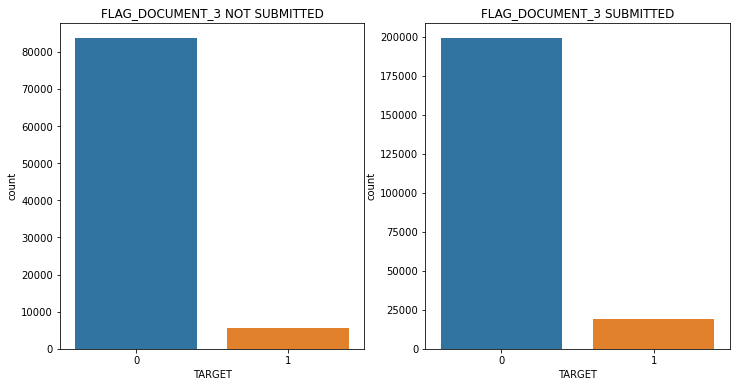

In [36]:
# Analysing FLAG_DOCUMENT_3

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(application_df[application_df["FLAG_DOCUMENT_3"] == 0]["TARGET"])
plt.title("FLAG_DOCUMENT_3 NOT SUBMITTED")
plt.subplot(1,2,2)
sns.countplot(application_df[application_df["FLAG_DOCUMENT_3"] == 1]["TARGET"])
plt.title("FLAG_DOCUMENT_3 SUBMITTED")

In [37]:
# Since the trend is same in both Submitted and Not Submitted cases, we can drop column FLAG_DOCUMENT_3

application_df.drop("FLAG_DOCUMENT_3",axis=1,inplace=True)

<AxesSubplot:>

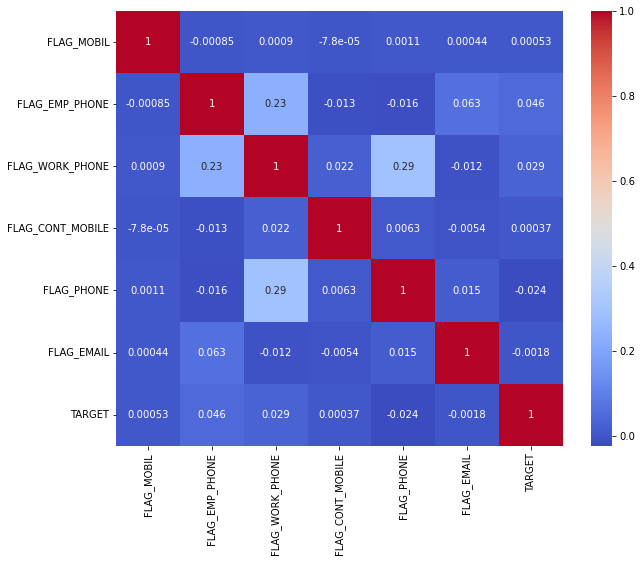

In [38]:
# Analyzing correlation between 'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL' and 'TARGET'

flag_contact = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','TARGET']
plt.figure(figsize=(10,8))
sns.heatmap(application_df[flag_contact].corr(),cmap='coolwarm',annot=True)

In [39]:
# Dropping the flag_contact columns as no correlation found

flag_contact.remove("TARGET")
application_df.drop(flag_contact,axis=1,inplace=True)

In [40]:
# Shape of dataframe after removing unnecessary columns

application_df.shape

(307511, 45)

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ###   Summary:
   - Upon analyzing the FLAG_DOCUMENT_X features, it was found that most of the applicants have not submitted FLAG_DOCUMENTS_X  
     (except DOC_3) hence dropped those features.
   - Upon further anaylsis of FLAG_DOCUMENT_3 feature, it was found that it does not bear an impact on the TARGET variable,        hence it was dropped.
   - No great correlation was found between the features 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 
     'FLAG_PHONE','FLAG_EMAIL' and the 'TARGET' variable, hence these features were dropped.
   - The final shape of the "application_data" dataset after dropping unneccesary features stands at <b>(307511, 45)</b>.

<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 6. Fixing Incorrect/Invalid/Unknown Data Values

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [41]:
# Inspecting Values of all variables

for col in application_df.columns:
    print(f'Value Counts of {col}:\n {application_df[col].value_counts()}')
    print("\n")

Value Counts of SK_ID_CURR:
 100002    1
337664    1
337661    1
337660    1
337659    1
         ..
218992    1
218991    1
218990    1
218989    1
456255    1
Name: SK_ID_CURR, Length: 307511, dtype: int64


Value Counts of TARGET:
 0    282686
1     24825
Name: TARGET, dtype: int64


Value Counts of NAME_CONTRACT_TYPE:
 Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


Value Counts of CODE_GENDER:
 F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


Value Counts of FLAG_OWN_CAR:
 N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


Value Counts of FLAG_OWN_REALTY:
 Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


Value Counts of CNT_CHILDREN:
 0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64


Value Counts of AMT_INCOME_TO

Value Counts of AMT_REQ_CREDIT_BUREAU_YEAR:
 1.0     104924
0.0      71801
2.0      50192
3.0      33628
4.0      20714
5.0      12052
6.0       6967
7.0       3869
8.0       2127
9.0       1096
11.0        31
12.0        30
10.0        22
13.0        19
14.0        10
17.0         7
15.0         6
19.0         4
18.0         4
16.0         3
25.0         1
23.0         1
22.0         1
21.0         1
20.0         1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64




In [42]:
# Inspecting DAYS_X columns for Incorrect Data Values

days_cols=[]
for col in application_df.columns:
    if "DAYS_" in col:
        days_cols.append(col)
        
application_df[days_cols].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373,-962.855657
std,4363.988632,141275.766519,3522.886321,1509.450419,826.808966
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


In [43]:
# Converting Negative values of DAYS_X variable for relevance

date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

for col in date_col:
    application_df[col] = abs(application_df[col])

In [44]:
# Inspecting CODE_GENDER variable for Incorrect Data Values

application_df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [45]:
# Replacing XNA to most frequent value as count of XNA is very low and it wouldn't cause any unbalanced biases.

application_df['CODE_GENDER'] = application_df['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

# Verification

application_df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [46]:
# Inspecting NAME_FAMILY STATUS for Incorrect Data Values

application_df.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [47]:
# Replacing "Unknown" to most frequent value(Mode) as its count is very low and it wouldn't cause any unbalanced biases.

application_df['NAME_FAMILY_STATUS'] = application_df['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)

# Verification

application_df['NAME_FAMILY_STATUS'].value_counts()

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

In [48]:
# Inspecting ORGANIZATION_TYPE for Incorrect Data Values

application_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [49]:
# Replacing XNA in ORGANIZATION_TYPE variable with "Unknown"
# Because replacing it with any existing catergory might influence the analysis

application_df["ORGANIZATION_TYPE"]=application_df["ORGANIZATION_TYPE"].apply(lambda x: 'Unknown' if x == 'XNA' else x)

# Verification

application_df["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
Unknown                   55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ###   Summary:
   - Converted values in features 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE' from negative to positive as days cannot be negative.
   - Replaced the marginal number of value "XNA" in CODE_GENDER feature with most frequent value "F".
   - Replaced the marginal number of value "Unknown" in NAME_FAMILY_STATUS feature with most frequent value "Married".
   - Replaced the significant number of value "XNA" in ORGANIZATION_TYPE" feature with "Unknown" as replacing it with any 
     other category might influence the analysis.

<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 7. Deriving New Features from Existing Features for Ease of Analysis

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [50]:
# Deriving AGE of the applicant from the DAYS_BIRTH variable for ease of analysis

application_df["AGE"]=application_df['DAYS_BIRTH'].apply(lambda x: x//365)

In [51]:
# Deriving YEARS OF EMPLOYMENT of the applicant from the DAYS_EMPLOYED variable for ease of analysis

application_df['YEARS_EMPLOYED'] = application_df['DAYS_EMPLOYED'].apply(lambda x: x//365)

In [52]:
# Deriving YEARS_REGISTRATION of the applicant from the DAYS_REGISTRATION variable for ease of analysis

application_df['YEARS_REGISTRATION'] = application_df['DAYS_REGISTRATION'].apply(lambda x: x//365)

In [53]:
# Deriving YEARS_ID_PUBLISH of the applicant from the DAYS_ID_PUBLISH variable for ease of analysis

application_df['YEARS_ID_PUBLISH'] = application_df['DAYS_ID_PUBLISH'].apply(lambda x: x//365)

In [54]:
# Deriving YEARS_LAST_PHONE_CHANGE of the applicant from the DAYS_LAST_PHONE_CHANGE variable for ease of analysis

application_df['YEARS_LAST_PHONE_CHANGE'] = application_df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: x//365)

In [55]:
# Dropping existing features after deriving new features from them

application_df.drop(application_df[days_cols],axis=1,inplace=True)

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ###   Summary:
   - Derived new features from the existing features for ease of analysis as follows:  
     a. AGE from DAYS_BIRTH feature.  
     b. YEARS_EMPLOYED from DAYS_EMPLOYED feature.  
     c. YEARS_REGISTRATION from DAYS_REGISTRATION feature.  
     d. YEARS_ID_PUBLISH from DAYS_ID_PUBLISH feature.  
     e. YEARS_LAST_PHONE_CHANGE from DAYS_LAST_PHONE_CHANGE feature.
   - Dropped the existing DAYS_X features as further analysis will be done on derived features.
   
<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 8. Data Type Conversion

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [56]:
# Inspecting Data Types of features

application_df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGI

In [57]:
# Data Type Conversion of Categorical features

cat_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
               'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
               'ORGANIZATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
               'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 
               'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']

for col in cat_cols:
    application_df[col] =pd.Categorical(application_df[col])    

In [58]:
# Verification

application_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE             category
CODE_GENDER                    category
FLAG_OWN_CAR                   category
FLAG_OWN_REALTY                category
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                category
NAME_INCOME_TYPE               category
NAME_EDUCATION_TYPE            category
NAME_FAMILY_STATUS             category
NAME_HOUSING_TYPE              category
REGION_POPULATION_RELATIVE      float64
OCCUPATION_TYPE                category
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT           category
REGION_RATING_CLIENT_W_CITY    category
WEEKDAY_APPR_PROCESS_START     category
HOUR_APPR_PROCESS_START           int64
REG_REGION_NOT_LIVE_REGION     category
REG_REGION_NOT_WORK_REGION     category


<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ###   Summary:
   - Numeric columns are already in int64 and float64 format. 
   - Converted categorical features to category format.
   
<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 9. Identifying and Handling Outliers

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

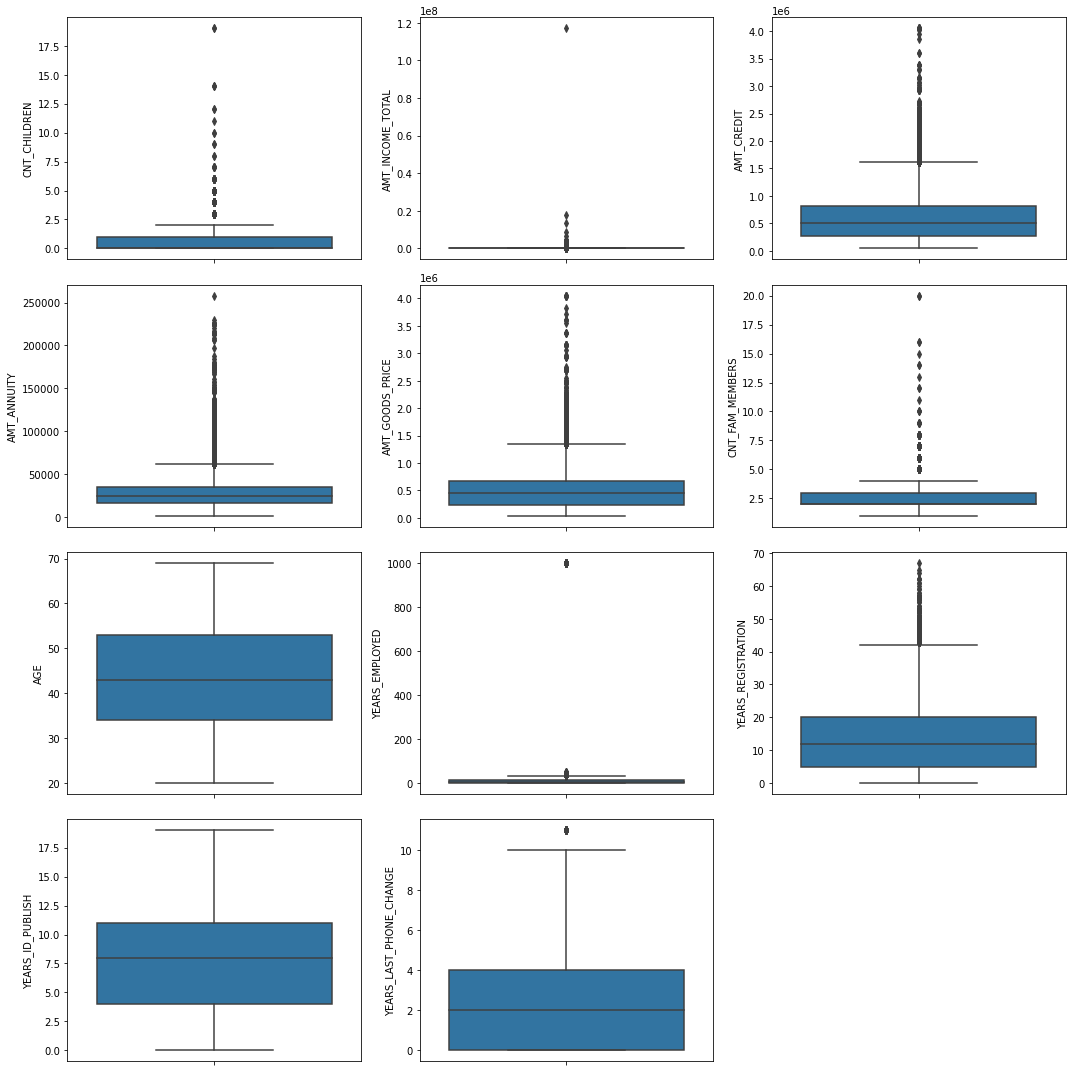

In [59]:
# Identifying the outliers in different variables

outlier_check=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS',
          'AGE','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH','YEARS_LAST_PHONE_CHANGE']

plt.figure(figsize=(15,15))

for i in enumerate(outlier_check):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(y=application_df[i[1]])
    plt.tight_layout()

In [60]:
# Checking NAME_INCOME_TYPE fοr category where YEARS_EMPLOYED is 1000

application_df[application_df['YEARS_EMPLOYED']==1000].NAME_INCOME_TYPE.value_counts()

Pensioner               55352
Unemployed                 22
Businessman                 0
Commercial associate        0
Maternity leave             0
State servant               0
Student                     0
Working                     0
Name: NAME_INCOME_TYPE, dtype: int64

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   
   ###   Summary:
   - CNT_CHILDREN, CNT_FAMILY_MEMBERS features have some number of outliers but the values can't be considered wrong  
     as peοple can have any number οf children or family members.
   - AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE features have outliers but the values are valid.
   - AGE feature has no outliers.
   - YEARS_EMPLOYED has outliers with value around 1000 years, which is practically impossible. However, on futher analysis,
     it was found that they belong to INCOME_TYPE "Pensioner" or "Unemployed". Hence, this insight would be considered 
     during analysis of this feature.
   - YEARS_REGISTRATION feature has outliers but the values are valid.
   - YEARS_ID_PUBLISH feature has no outliers.
   - YEARS_LAST_PHONE_CHANGE has outliers 11, but the values are valid.
   
   
<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 10. Binning

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [61]:
# Creating bins for AGE

bins = [0,20,30,40,50,100]
labels = ['0-20 Years','20-30 Years','30-40 Years','40-50 Years','Above 50 Years']

application_df['AGE_RANGE']=pd.cut(application_df['AGE'],bins=bins,labels=labels)

application_df['AGE_RANGE'].value_counts(normalize=True)*100

Above 50 Years    31.604398
30-40 Years       27.028952
40-50 Years       24.194582
20-30 Years       17.171743
0-20 Years         0.000325
Name: AGE_RANGE, dtype: float64

In [62]:
# Creating bins for YEARS_EMPLOYED

bins = [0,5,10,20,30,40,50,60,150]
labels = ['0-5 Years','5-10 Years','10-20 Years','20-30 Years','30-40 Years','40-50 Years','50-60 Years','Above 60 Years']

application_df['EMPLOYMENT_YEAR_RANGE']=pd.cut(application_df['YEARS_EMPLOYED'],bins=bins,labels=labels)

application_df['EMPLOYMENT_YEAR_RANGE'].value_counts(normalize=True)*100

0-5 Years         55.582363
5-10 Years        24.966441
10-20 Years       14.564315
20-30 Years        3.750117
30-40 Years        1.058720
40-50 Years        0.078044
50-60 Years        0.000000
Above 60 Years     0.000000
Name: EMPLOYMENT_YEAR_RANGE, dtype: float64

In [63]:
# Creating bins for AMT_INCOME_TOTAL

application_df['AMT_INCOME_TOTAL']=application_df['AMT_INCOME_TOTAL']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,11]
labels = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k',
          '900k-1M', 'Above 1M']

application_df['AMT_INCOME_RANGE']=pd.cut(application_df['AMT_INCOME_TOTAL'],bins=bins,labels=labels)

application_df['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
Above 1M      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

In [64]:
# Creating bins for AMT_CREDIT

application_df['AMT_CREDIT']=application_df['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
labels = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', 'Above 1M']

application_df['AMT_CREDIT_RANGE']=pd.cut(application_df['AMT_CREDIT'],bins=bins,labels=labels)

application_df['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
Above 1M     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

In [65]:
# Creating bins for AMT_GOODS_PRICE

application_df['AMT_GOODS_PRICE']=application_df['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
labels = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', 'Above 1M']

application_df['AMT_GOODS_PRICE_RANGE']=pd.cut(application_df['AMT_GOODS_PRICE'],bins=bins,labels=labels)

application_df['AMT_GOODS_PRICE_RANGE'].value_counts(normalize=True)*100

200k-300k    20.409351
400k-500k    18.617545
600k-700k    13.015469
Above 1M     11.095213
100K-200K    10.717015
800k-900k     6.986417
300k-400k     6.900241
500k-600k     4.265538
0-100K        2.832094
700k-800k     2.637304
900k-1M       2.523812
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

In [66]:
# Creating bins for AMT_ANNUITY

application_df['AMT_ANNUITY']=application_df['AMT_ANNUITY']/10000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
labels = ['0-10K','10K-20K', '20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k',
       '80k-90k','90k-100k', 'Above 100k']

application_df['AMT_ANNUITY_RANGE']=pd.cut(application_df['AMT_ANNUITY'],bins=bins,labels=labels)

application_df['AMT_ANNUITY_RANGE'].value_counts(normalize=True)*100

20k-30k       30.073071
10K-20K       27.063097
30k-40k       19.043872
40k-50k        9.322919
0-10K          7.571436
50k-60k        4.281148
60k-70k        1.642543
70k-80k        0.506649
80k-90k        0.197391
Above 100k     0.164222
90k-100k       0.133654
Name: AMT_ANNUITY_RANGE, dtype: float64

In [67]:
# Creating bins for YEARS_REGISTRATION

bins = [0,5,10,20,30,40,50,60,150]
labels = ['0-5 Years','5-10 Years','10-20 Years','20-30 Years','30-40 Years','40-50 Years','50-60 Years','Above 60 Years']

application_df['YEARS_REGISTRATION_RANGE']=pd.cut(application_df['YEARS_REGISTRATION'],bins=bins,labels=labels)

application_df['YEARS_REGISTRATION_RANGE'].value_counts(normalize=True)*100

10-20 Years       33.572564
0-5 Years         22.299022
20-30 Years       19.586175
5-10 Years        18.989589
30-40 Years        5.116393
40-50 Years        0.414238
50-60 Years        0.019267
Above 60 Years     0.002752
Name: YEARS_REGISTRATION_RANGE, dtype: float64

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   
   ###   Summary:
   - 31% loan applicants have age above 50 years. Around 58% of loan applicants have age over 40 years.
   - More than 55% of the loan applicants have work experience within 0-5 years and almost 80% of them have less 
     than 10 years of work experience.
   - More than 50% loan applicants have income amount in the range of 100K-200K and almost 92% loan applicants have  
     income less than 300K.
   - More than 16% loan applicants have taken loan which amounts to more than 1M among others.
   - Around 20% of the applicants have taken loan for goods in price range 200K-300K.
   - Around 30% of the applicants have loan annuity in the range of 20K-30K. Also, more than 70% of the loan applicant have  
     loan annuity in the range 10k-40k.
   - Around 33% of the applicants have changed their registration 10-20 years before the application.   
   
<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 11. Data Imbalance Analysis

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

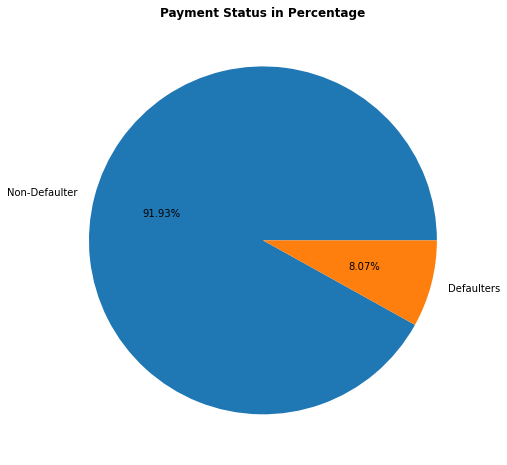

In [68]:
# Checking Data Imbalance

plt.figure(figsize=(8,8))
plt.title("Payment Status in Percentage",weight="bold")
application_df['TARGET'].value_counts(normalize=True).plot.pie(autopct = "%1.2f%%",
            labels=["Non-Defaulter","Defaulters"])
plt.ylabel("")
plt.show()


In [69]:
# Printing the ratio of On-Time Payment Clients and Clients with Payment Difficulties

print("Ratio :",round(application_df.TARGET.value_counts()[0]/application_df.TARGET.value_counts()[1],2),"%")

Ratio : 11.39 %


In [70]:
# Printing the count of On-Time Payment Clients and Clients with Payment Difficulties

print("Count of On-Time Payment Clients :  \t\t",application_df.TARGET.value_counts()[0])
print("Count of Clients with Payment Difficulties:\t",application_df.TARGET.value_counts()[1])

Count of On-Time Payment Clients :  		 282686
Count of Clients with Payment Difficulties:	 24825


In [71]:
# Bifurcating the application_df dataframe based on Target value 0 and 1 for correlation and other analysis

non_defaulter = application_df[application_df['TARGET'] == 0]
defaulter = application_df[application_df['TARGET'] == 1]

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   
   ###   Summary:
   - The data is highly imbalanced as number of Clients with Payment Difficulties are very less in total population.
   - There are 91.93% On-Time Payment Clients and 8.07% Clients with Payment Difficulties.  
   - There are 24825 Clients with Payment Difficulties and 282686 On-TIme Payment Clients. 
   - Ratio of Client with Payment Difficulties & On-Time Payment Clients is 11.39%. 
   
   #### Note:
   - Bifurcated the application_df dataframe based on TARGET variable for further analysis.
   
<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 12. Defining functions for repetitive plots to be used in Analysis

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [72]:
## Defining function for plots in segmented univariate analysis

# Function_name : univariate_segmented
# Usage : Creates two sub-plots
# Arguments : df,feature, label_rotation and horizontal_layout  
# Returns : 
        # a. Count plot wrt TARGET variable
        # b. Defaulter % Bar plot within the feature 

def univariate_segmented(df,feature,label_rotation=False,horizontal_layout=True):
    count = df[feature].value_counts()
    temp_df = pd.DataFrame({feature: count.index,'Number of Applicants': count.values})

    # Calculate the percentage of target=1 per category value
    percent_value = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    percent_value["TARGET"] = percent_value["TARGET"]*100
    percent_value.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=df,
                    hue ="TARGET",
                    order=df[feature].value_counts().index,
                    palette='Paired')
    for p in s.patches:
        s.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    
    # Define common styling
    ax1.set_title(f"Feature : {feature}\n [ Count of Defaulters and Non-Defaulters ]\n", fontdict={'fontsize' : 15, 'fontweight' : 12, 'color' : 'Black'}) 
    ax1.set_xlabel("")
    ax1.legend(['Non-Defaulter','Defaulter'])
    ax1.set_yscale('log')
    ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 12, 'fontweight' : 3, 'color' : 'Blue'})
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    data=percent_value,
                    order=percent_value[feature], 
                    palette='bright')
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    plt.ylabel('Defaulters %', fontdict={'fontsize' : 12, 'fontweight' : 3, 'color' : 'Blue'})
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_xlabel("")
    ax2.set_title(f"Feature : {feature}\n [ Percentage of Defaulters ]\n", fontdict={'fontsize' : 15, 'fontweight' : 12,'color' : 'Black'}) 
    ax2.bar_label(ax2.containers[-1], fmt='\n%.2f', label_type='center')
    
    plt.tight_layout()
    plt.show();
    print("-"*125)

In [73]:
## Defining function for plots in bivariate analysis

# Function_name : bivariate_analysis
# Usage : Creates barplot for bivariate analysis
# Arguments : df,col1,col2  
# Returns : A barplot comparing the two features on "TARGET" variable

def bivariate_analysis(df,col1,col2):
    plt.figure(figsize=(15,8))
    labels=["Non-Defaulter","Defaulter"]
    s=sns.barplot(x=col1, y=col2,data=df,hue="TARGET",palette=['g','r']) 
    plt.title(f"{col1} vs {col2}",weight="bold") 
    h, l = s.get_legend_handles_labels()
    s.legend(h, labels)
    plt.show()

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 13. Univariate and Segmented Univariate Analysis

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [74]:
# Setting plot style

plt.style.use('seaborn-bright')

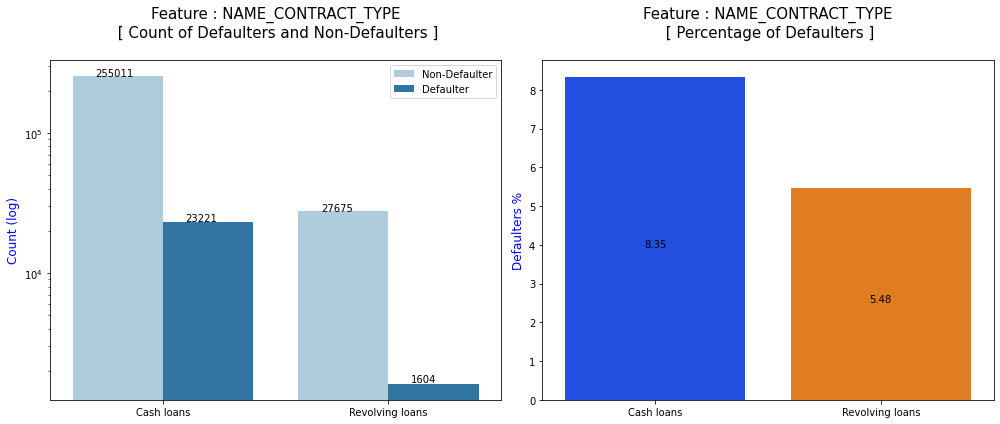

-----------------------------------------------------------------------------------------------------------------------------


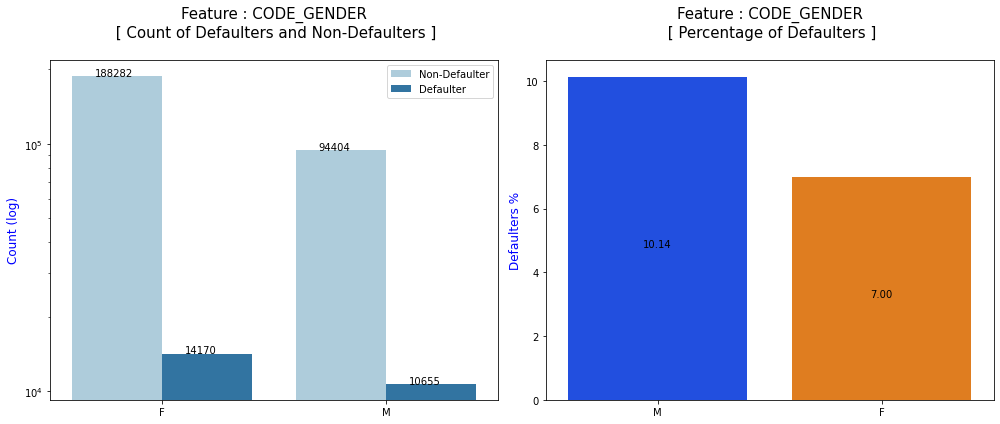

-----------------------------------------------------------------------------------------------------------------------------


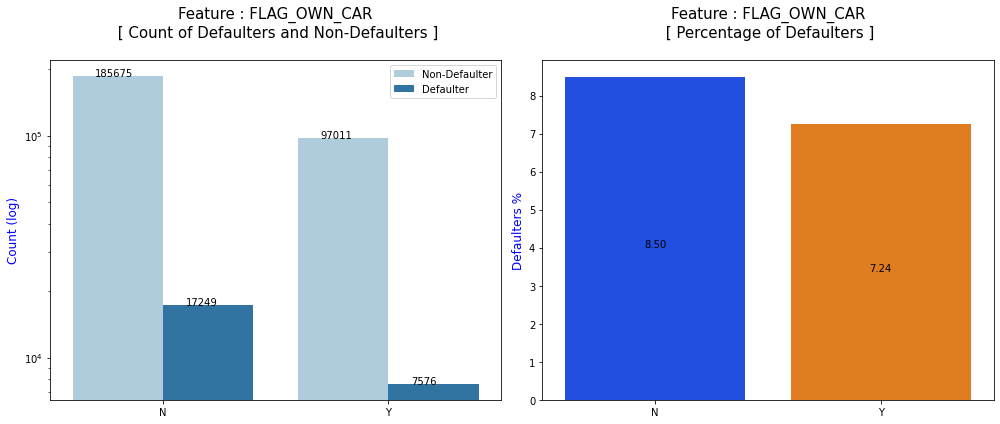

-----------------------------------------------------------------------------------------------------------------------------


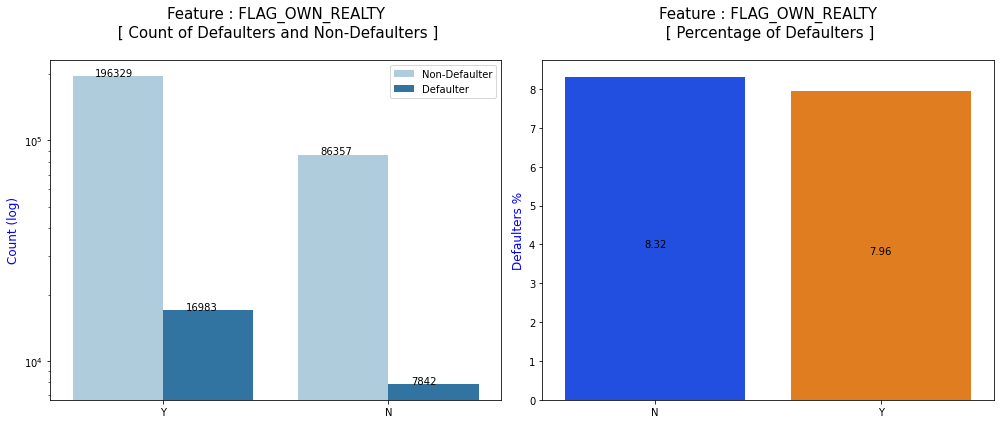

-----------------------------------------------------------------------------------------------------------------------------


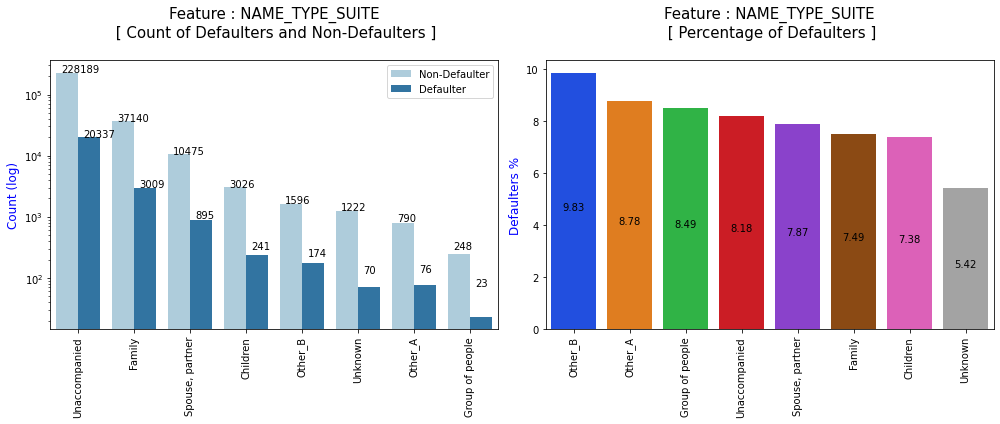

-----------------------------------------------------------------------------------------------------------------------------


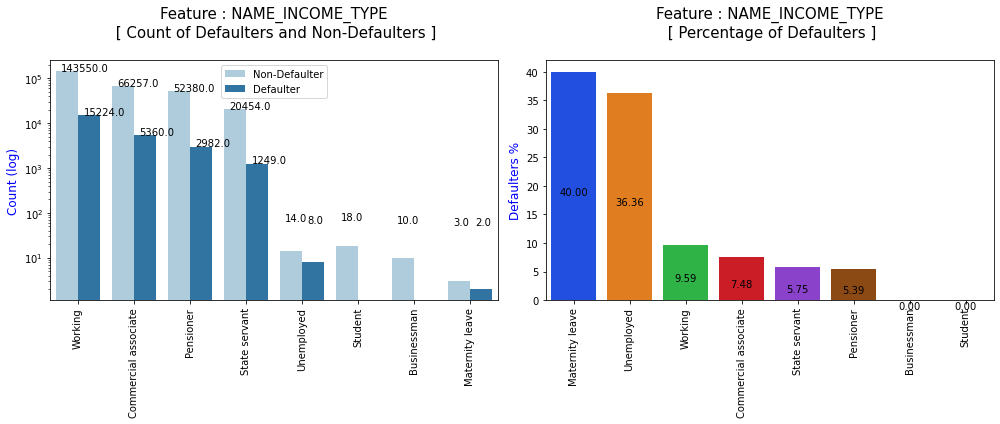

-----------------------------------------------------------------------------------------------------------------------------


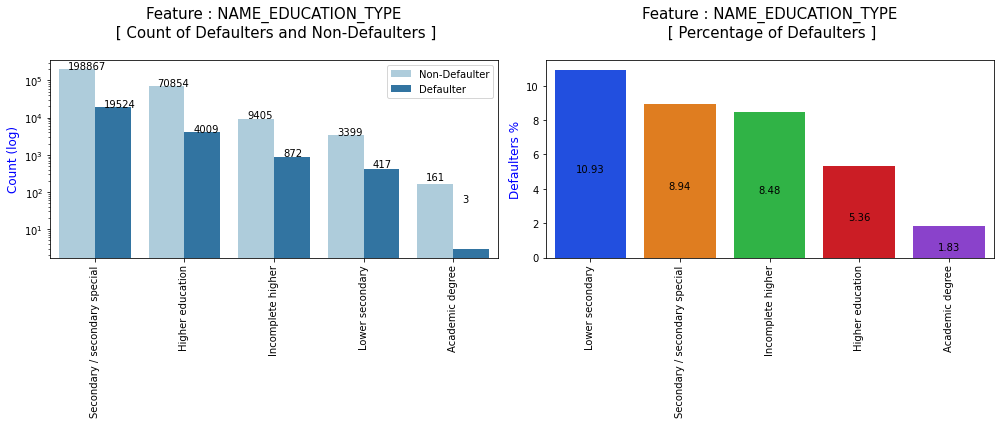

-----------------------------------------------------------------------------------------------------------------------------


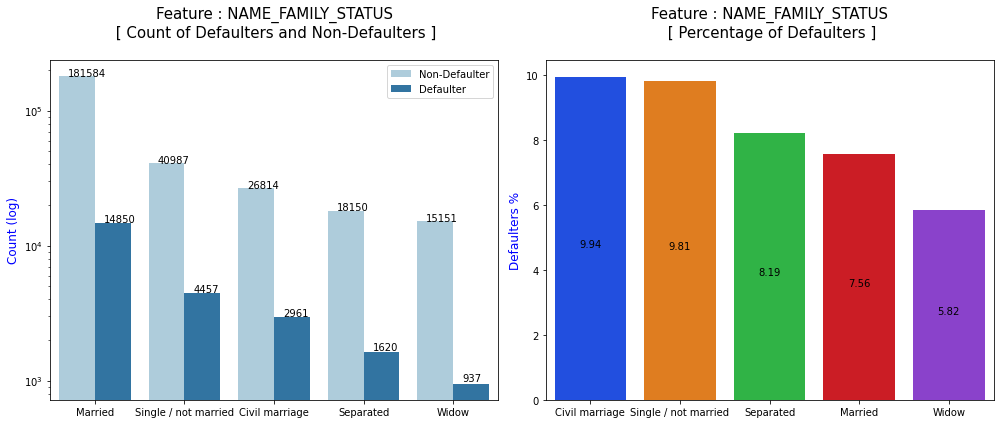

-----------------------------------------------------------------------------------------------------------------------------


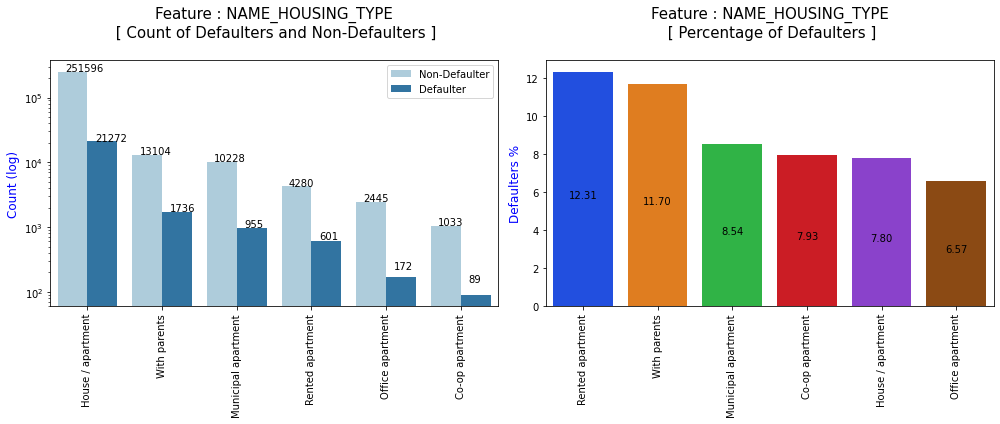

-----------------------------------------------------------------------------------------------------------------------------


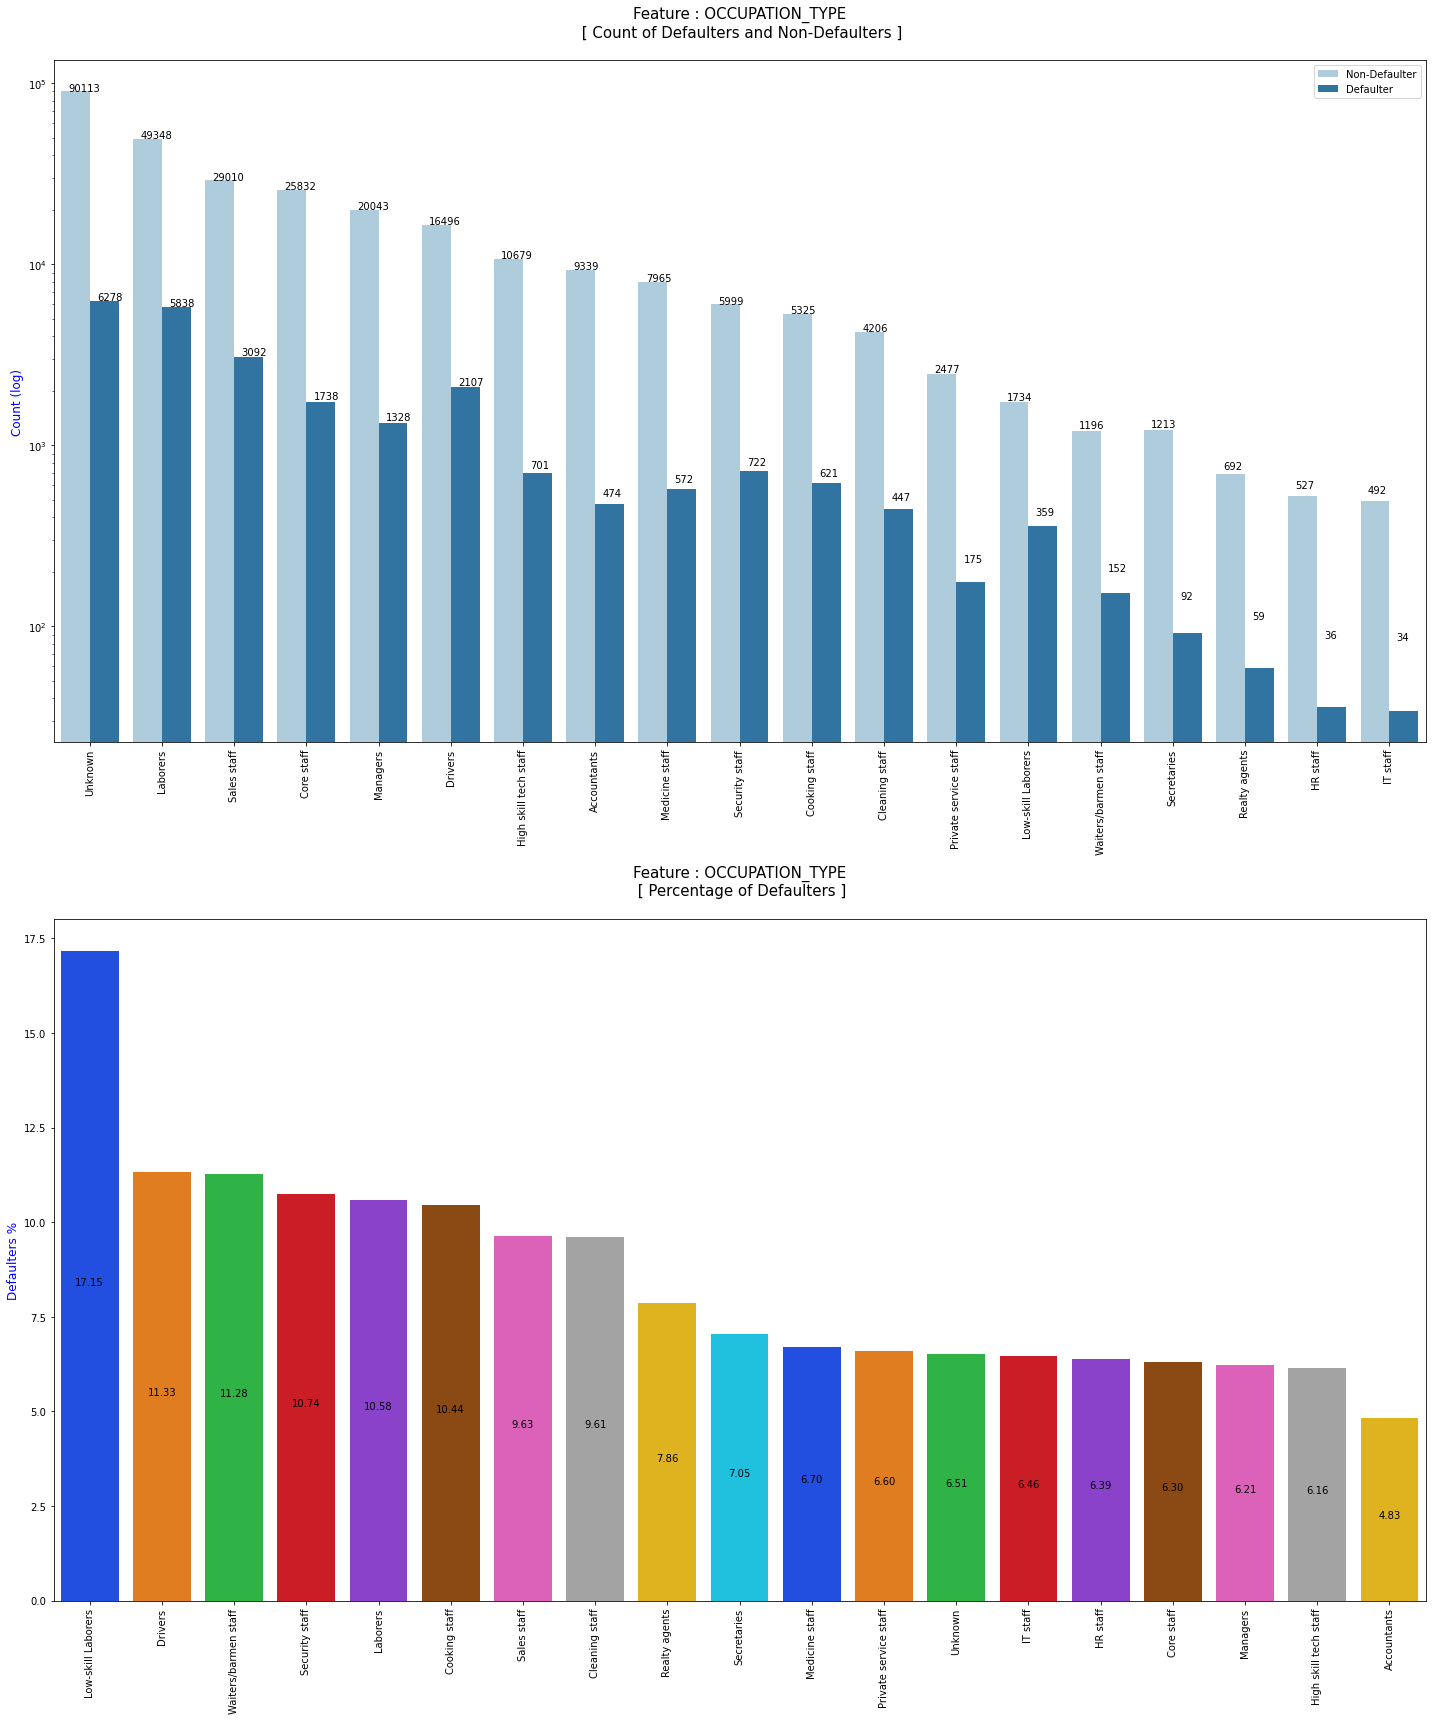

-----------------------------------------------------------------------------------------------------------------------------


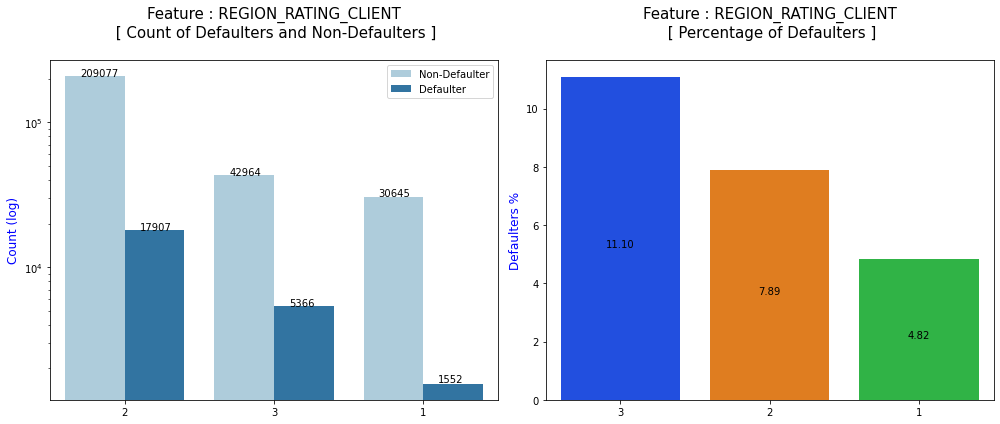

-----------------------------------------------------------------------------------------------------------------------------


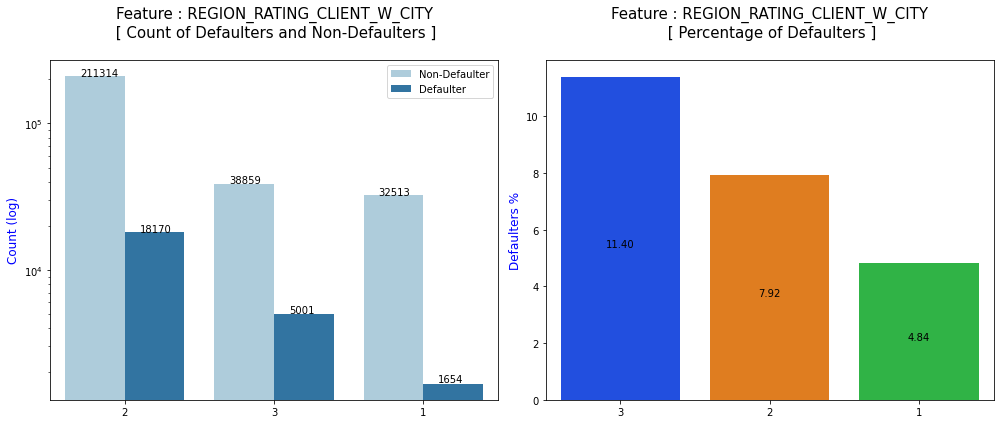

-----------------------------------------------------------------------------------------------------------------------------


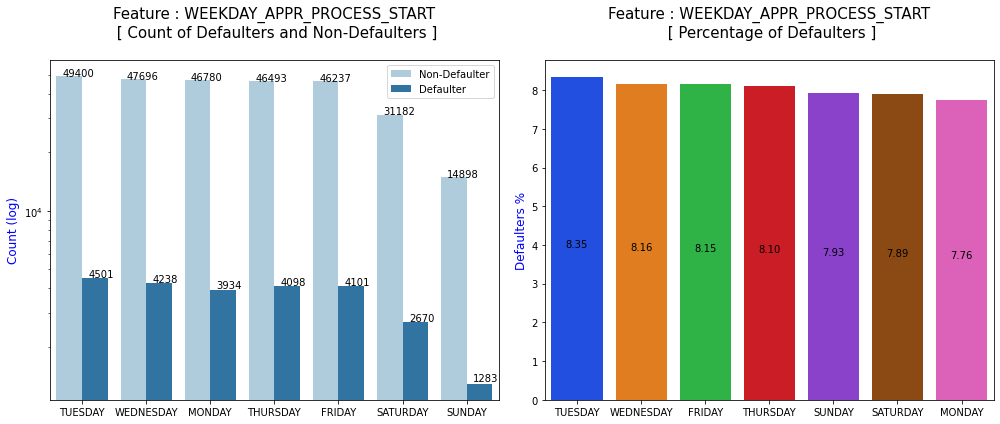

-----------------------------------------------------------------------------------------------------------------------------


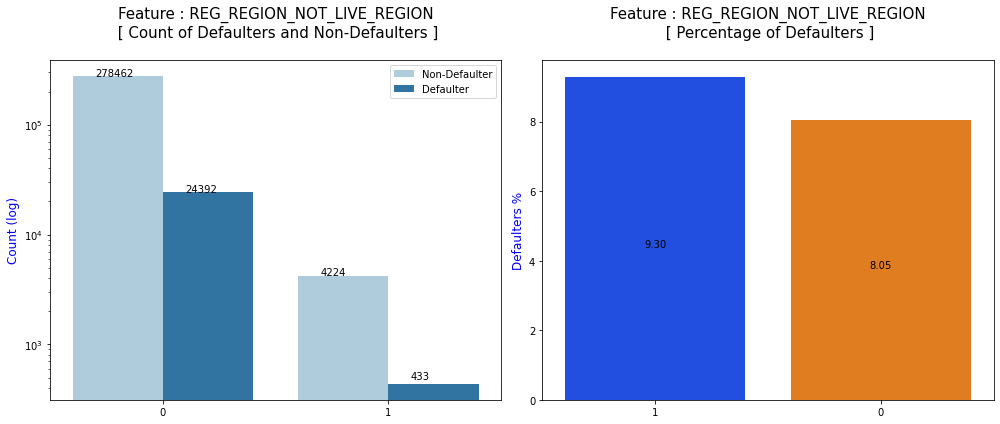

-----------------------------------------------------------------------------------------------------------------------------


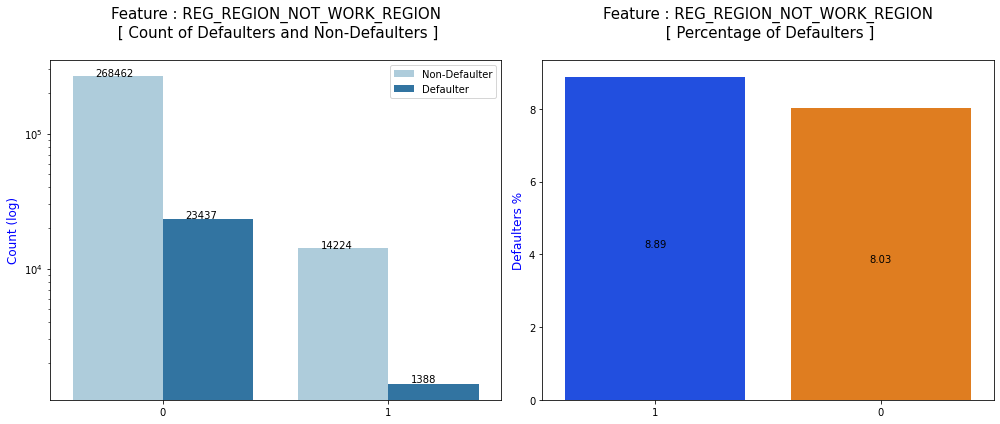

-----------------------------------------------------------------------------------------------------------------------------


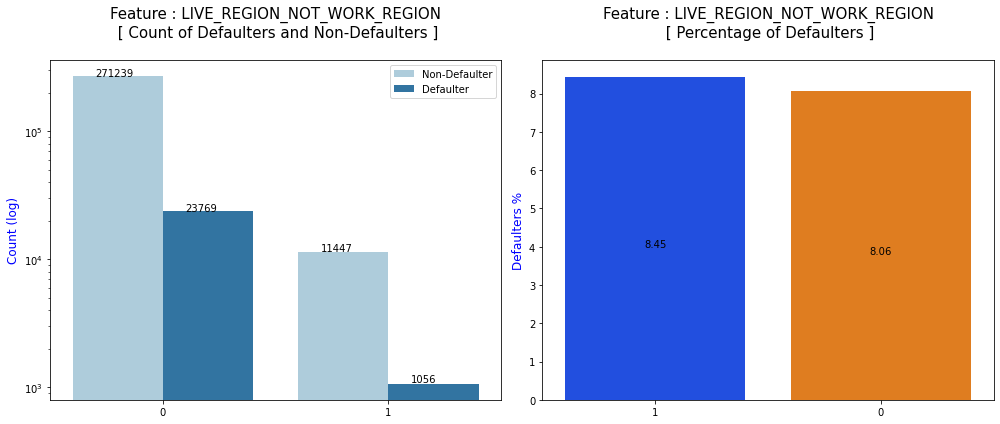

-----------------------------------------------------------------------------------------------------------------------------


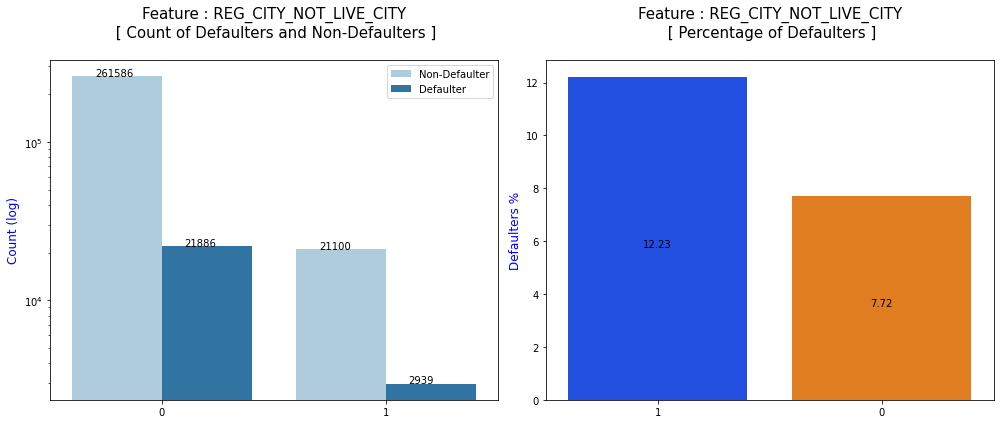

-----------------------------------------------------------------------------------------------------------------------------


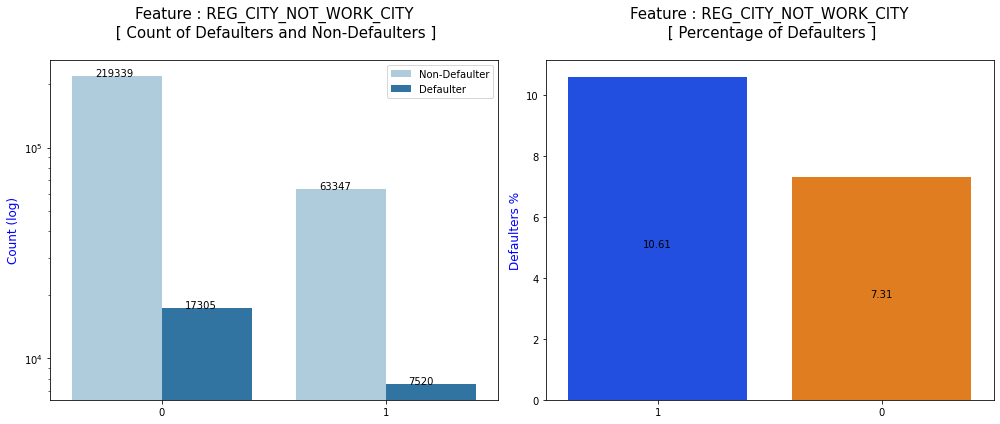

-----------------------------------------------------------------------------------------------------------------------------


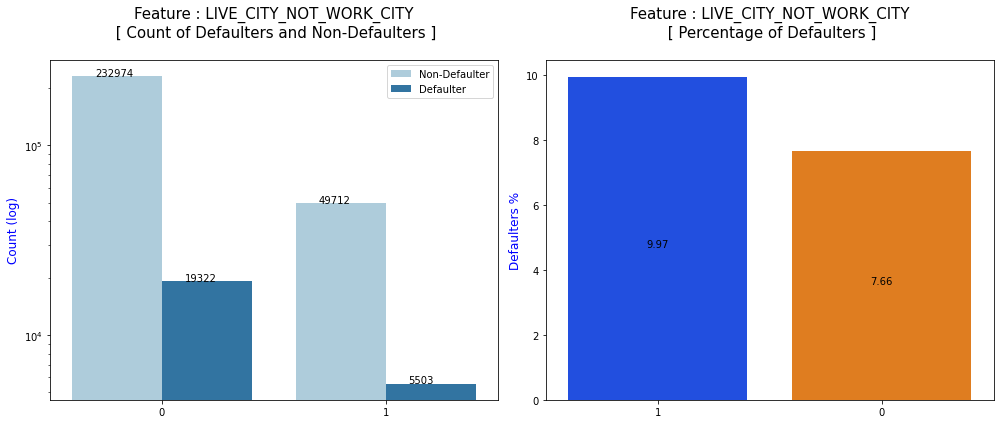

-----------------------------------------------------------------------------------------------------------------------------


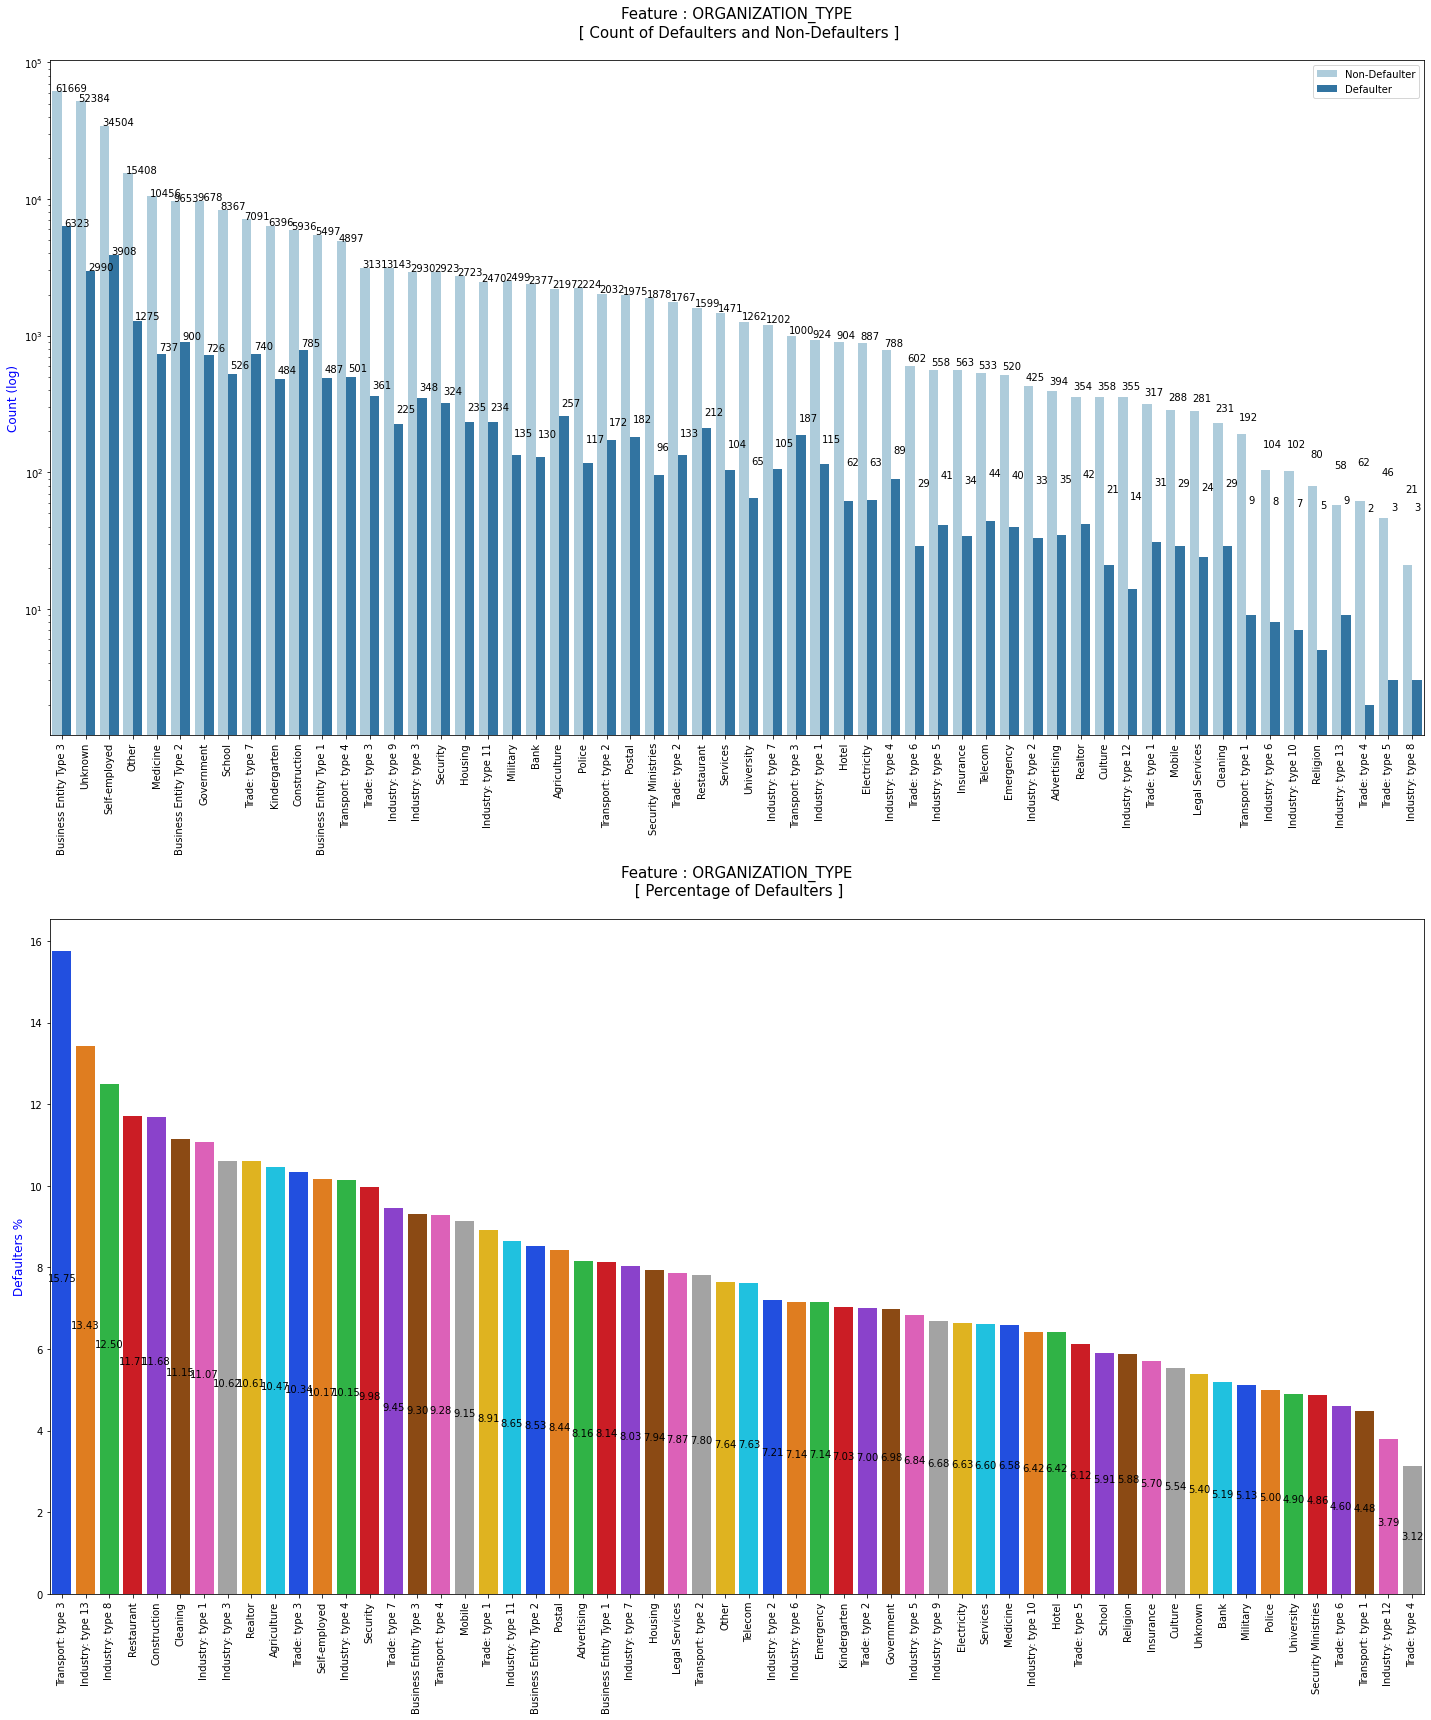

-----------------------------------------------------------------------------------------------------------------------------


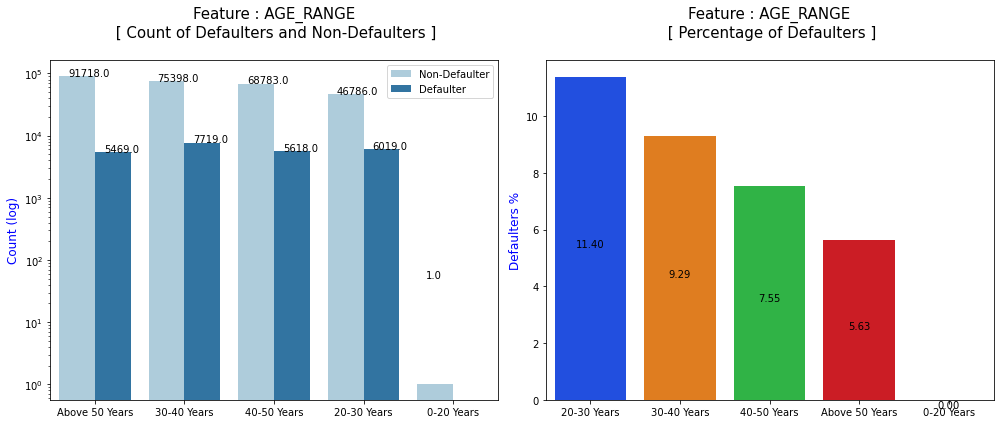

-----------------------------------------------------------------------------------------------------------------------------


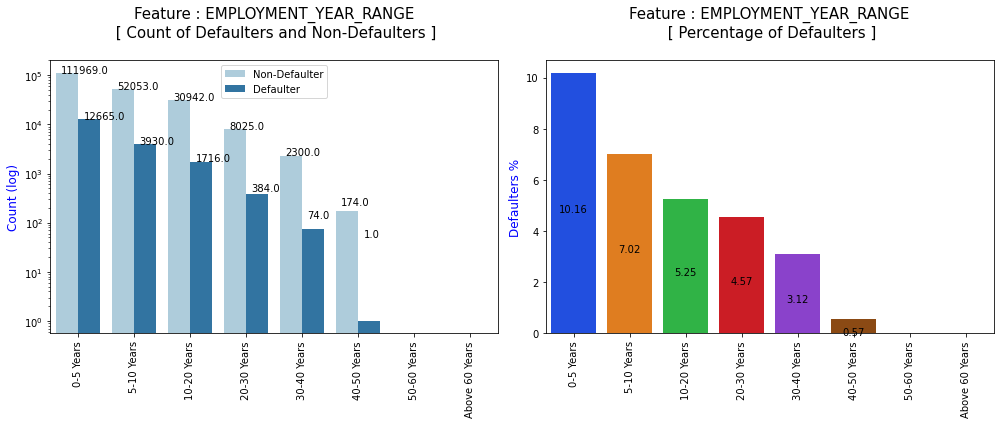

-----------------------------------------------------------------------------------------------------------------------------


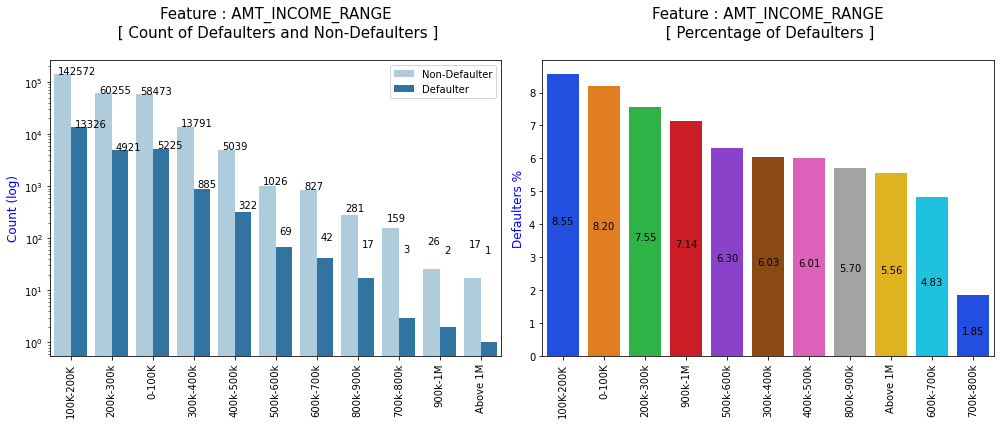

-----------------------------------------------------------------------------------------------------------------------------


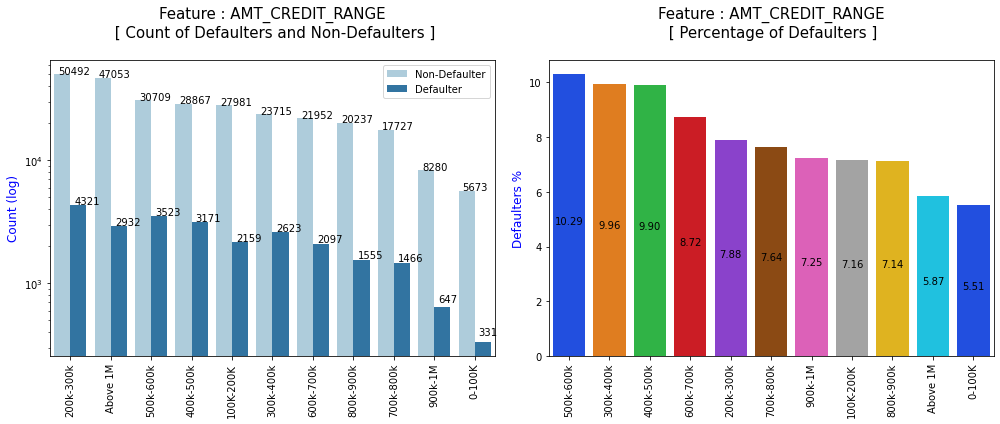

-----------------------------------------------------------------------------------------------------------------------------


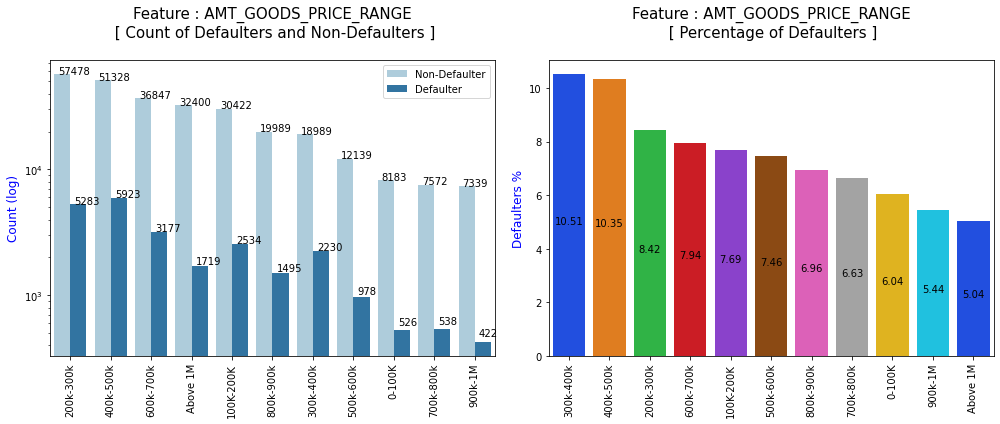

-----------------------------------------------------------------------------------------------------------------------------


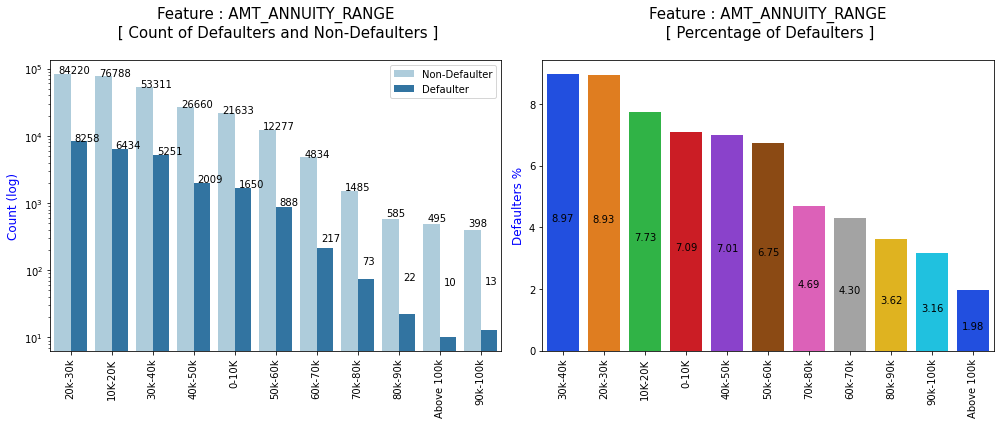

-----------------------------------------------------------------------------------------------------------------------------


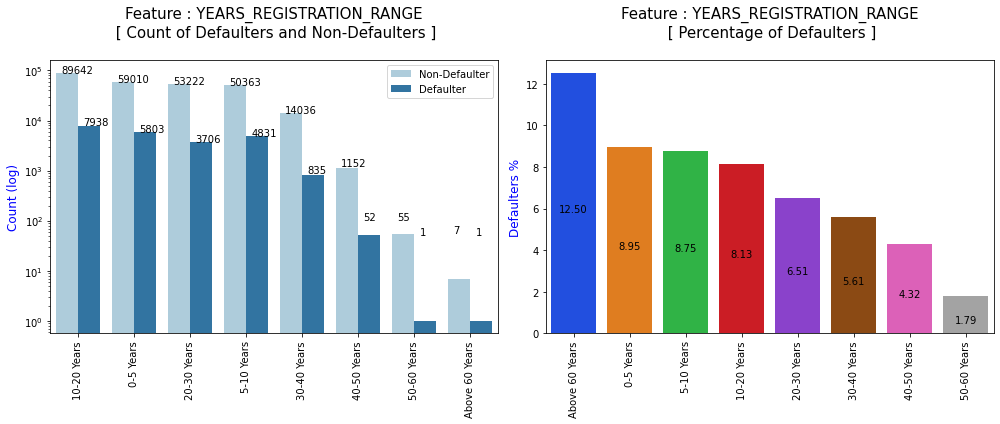

-----------------------------------------------------------------------------------------------------------------------------


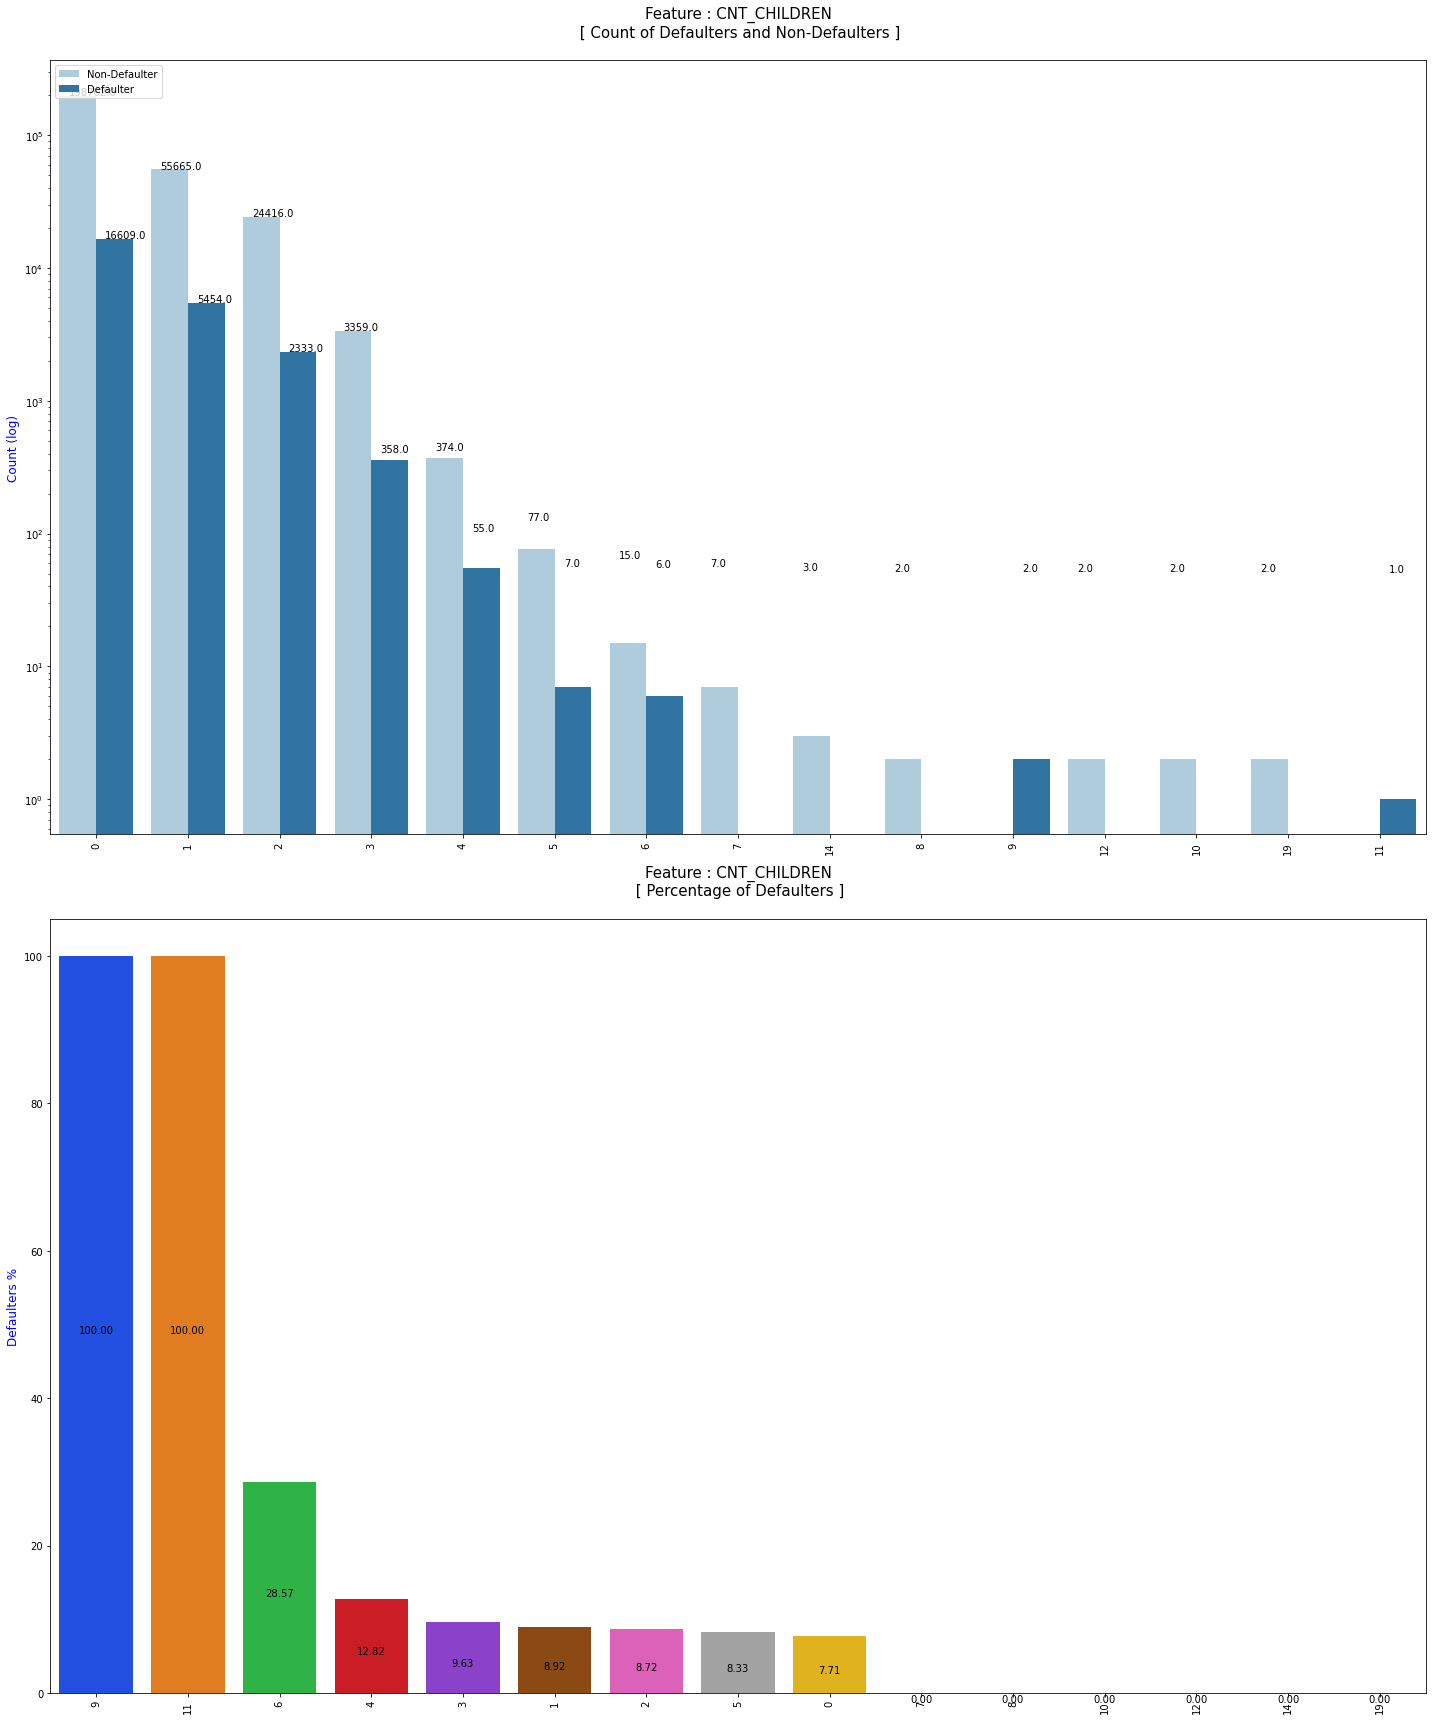

-----------------------------------------------------------------------------------------------------------------------------


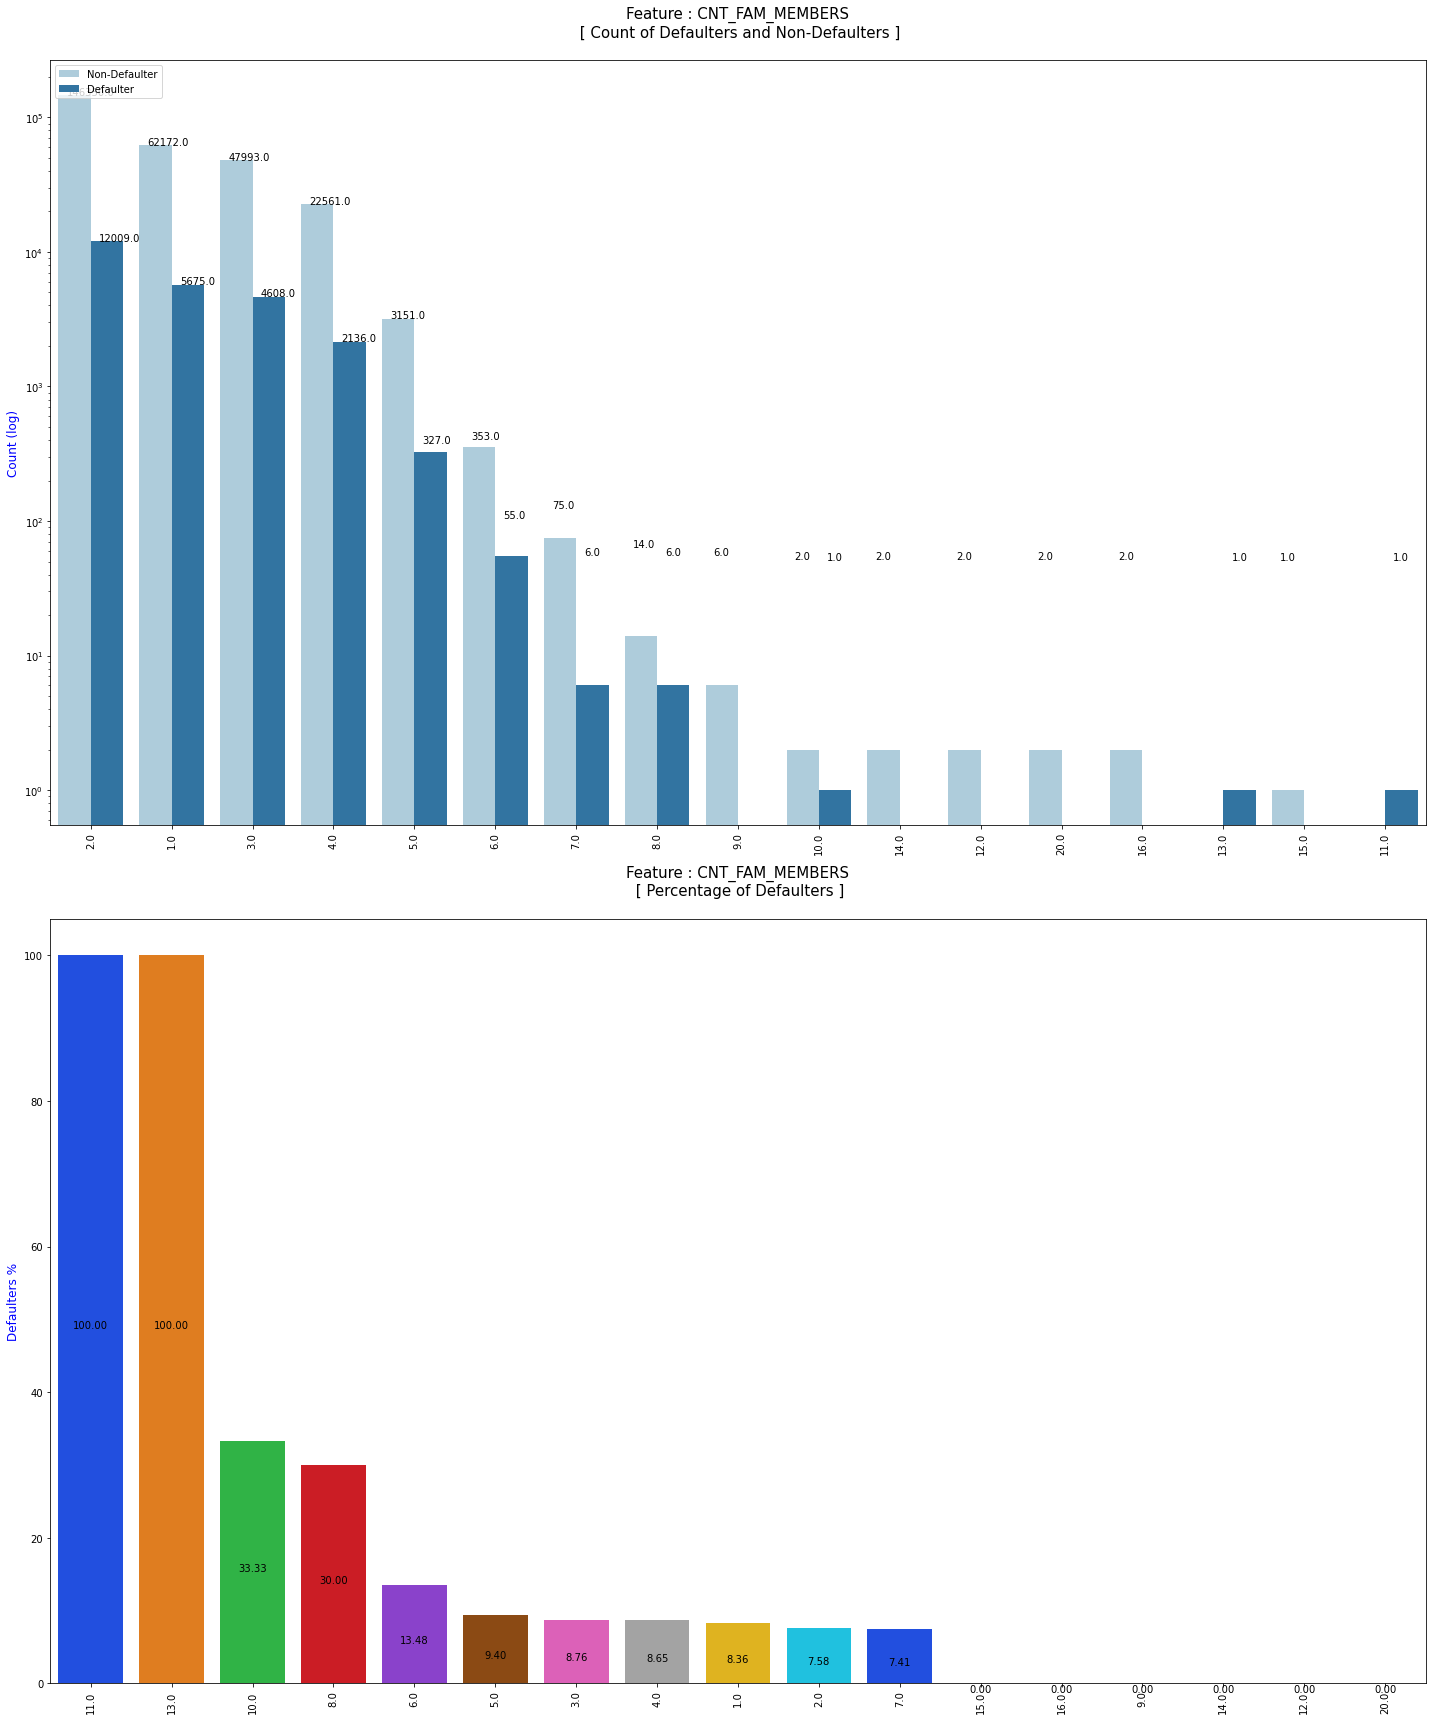

-----------------------------------------------------------------------------------------------------------------------------


In [75]:
cat_feat=list(application_df.select_dtypes(include = "category").columns) + ["CNT_CHILDREN","CNT_FAM_MEMBERS"]
for col in cat_feat:
    if col in ["NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_HOUSING_TYPE",'EMPLOYMENT_YEAR_RANGE',
               'AMT_INCOME_RANGE','AMT_CREDIT_RANGE','AMT_GOODS_PRICE_RANGE','AMT_ANNUITY_RANGE','YEARS_REGISTRATION_RANGE']:
        univariate_segmented(application_df,col,True,True)
    elif col in ["ORGANIZATION_TYPE","OCCUPATION_TYPE","CNT_CHILDREN","CNT_FAM_MEMBERS"]:
        univariate_segmented(application_df,col,True,False)
    else:
        univariate_segmented(application_df,col)

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   
   ###   Summary:
   - <b>NAME_CONTRACT_TYPE</b>
               > There are more clients for Cash loans than Revolving loans.    
               > Deaulter percentage is higher in Cash loans.
   - <b>CODE_GENDER</b>  
               > There are more Females clients than Males. 
               > Defaulter percentage is higher in Males. 
   - <b>FLAG_OWN_CAR</b>  
               > There are more clients who do not own car than who own car.
               > Defaulter percentage is marginally higher for clients who do not own car.
   - <b>FLAG_OWN_REALTY</b>  
               > There are more clients who own realty than who do not own realty.
               > Defaulter percentage is marginally higher for clients who do not own realty.
   - <b>NAME_TYPE_SUITE</b>  
               > Most of the clients were Unaccompanied when they were applying for the loan.
               > Defaulter percentage is highest for Other_B.
   - <b>NAME_INCOME_TYPE</b>  
               > Most of the clients have income type as Working, followed by Commercial associate, 
                 Pensioner and State servant.
               > Clients who are Unemployed and maternity leave have high default rate. 
               > Student and Businessmen, though less in numbers do not have any default record.
   - <b>NAME_EDUCATION_TYPE</b>  
               > Most of the clients have Secondary/secondary special education, followed by 
                 Higher education.
               > Clients with education type as Lower secondary category have the highest default rate.
               > Clients with Academic degree have least defaulting rate.
   - <b>NAME_FAMILY_STATUS</b>  
               > Most of the clients are married, followed by Single/not married and civil marriage
               > Single & civil marriage clients have high default rate.
   - <b>NAME_HOUSING_TYPE</b>  
               > Most of the clients live in House/apartment.
               > Clients living with parent & living in rented apartments have high default rate.
               > clients living in office apartments have lowest default rate.               
   - <b>OCCUPATION_TYPE</b>
               > Most of the clients are Labour class followed by Sales staff
               > Very few clients have occupation type IT staff.
               > Low-skill labourers have the highest default rate.
   - <b>REGION_RATING_CLIENT</b>
               > Most of the clients are living in the region with Region_Rating 2.
               > Clients living in the region with Region Rating 3 have the highest default rate
               > Clients living in the region with Region_Rating 1 have the lowest default rate
   - <b>REGION_RATING_CLIENT_W_CITY</b>
               > Most of the clients are from the region rated 2 by bank taking city into account. 
               > Defaulter percentage is highest for the clients living in region rated 3 by bank 
                 taking city into account. 
   - <b>REG_REGION_NOT_LIVE_REGION</b>
               > Most of the client's permanent address is same as their contact address(Region level).
               > Defaulter percentage is marginally higher for clients whose permanent address
                 is different to their contact address(Region level).
   - <b>REG_REGION_NOT_WORK_REGION</b>
               > Follows simlar pattern as REG_REGION_NOT_LIVE_REGION.
   - <b>LIVE_REGION_NOT_WORK_REGION</b>
               > Follows simlar pattern as REG_REGION_NOT_LIVE_REGION.
   - <b>REG_CITY_NOT_LIVE_CITY</b>
               > Follows simlar pattern as REG_REGION_NOT_LIVE_REGION.
   - <b>REG_CITY_NOT_WORK_CITY</b>
               > Follows simlar pattern as REG_REGION_NOT_LIVE_REGION.
   - <b>LIVE_CITY_NOT_WORK_CITY</b>
               > Follows simlar pattern as REG_REGION_NOT_LIVE_REGION.
   - <b>ORGANIZATION_TYPE</b>
               > Most of the clients are from Business Entity Type 3.
               > For a very high number of applications, Organization type information is unknown(XNA).
               > Transport: type 3, Industry: type 13 , Industry: type 8 , and Restaurant: type 3 are 
                 the organisations with the highest percentage of defaulters.
               > Trade Type 4 and 5, Industry type 8 have the least default rate.
   - <b>AGE_RANGE</b>
               > Clients in the age group range 20-40 have higher probability of defaulting.
               > CLients above age of 50 have low probability of defaulting.
   - <b>EMPLOYMENT_YEAR_RANGE</b>
               > Majority of the clients have been employeed in between 0-5 years. The defaulting rate 
                 of this group is also the highest.
               > With increase of employment year, defaulting rate is gradually decreasing with clients 
                 having 40+ year experience having less than 1% default rate.
   - <b>AMT_INCOME_RANGE</b>
               > 90% of the applications have Income total less than 3,00,000.
               > Clients with Income less than 3,00,000 have high probability of defaulting.
               > Clients with Income more than 7,00,000 are less likely to default.
   - <b>AMT_CREDIT_RANGE</b>
               > More than 80% of the loan provided are for amount less than 9,00,000.
               > People who get loan for 300-600k tend to default more than others.
   - <b>AMT_GOODS_PRICE_RANGE</b>
               > Around 20% of the clients have taken loan for goods in price range 200K-300K.
               > Defaulter percentage of clients taking loan for goods in price range 300k-500k is highest.
   - <b>AMT_ANNUITY_RANGE</b>
               > More than 70% of the loan provided have loan annunity in the range 10-40k.
               > Defaulter percentage is higher for the clients with loan annuity in the same range.
   - <b>YEARS_REGISTRATION_RANGE</b>
               > Around 33% of the clients have changed their registration 10-20 years before the 
                 application. 
               > Defaulter percentage is higher for clients who have changed their registration more 
                 than 50 years before the application.
   - <b>CNT_CHILDREN</b>
               > Most of the clients do not have children.
               > Client who have more than 4 children has a very high default rate with child 
                 count 9 and 11 showing 100% default ratey.
   - <b>CNT_FAM_MEMBERS</b>
               > Most of the clients have family members in the range of 1 to 4.
               > Defaulter percentage is positively correlated to the count of family members with 
                 100 % default rate of clients having family members 11 and 13.


               
<p style="padding: 0.05px;
              color:white;">
</p>
</div>

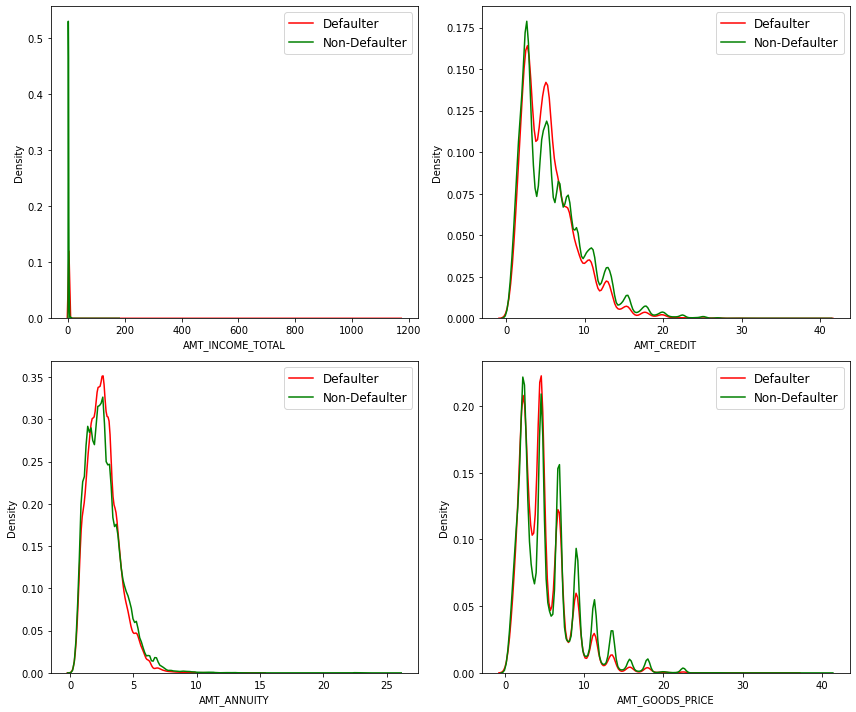

In [76]:
# Plotting the numerical columns related to amount as distribution plot to see density

num_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

plt.figure(figsize=(12,10))
grid=1
for col in num_cols:
    plt.subplot(2,2,grid)
    sns.distplot(defaulter[col],hist=False,label="Defaulter",color="red")
    sns.distplot(non_defaulter[col],hist=False,label="Non-Defaulter",color="green")
    plt.legend(fontsize=12)
    plt.tight_layout()
    grid+=1

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   
   ###   Summary:
   - Most number of loans are given for goods price below 10 lakhs.
   - Most people pay annuity below 50000 for the credit loan.
   - Credit amount of the loan is mostly less then 10 lakhs.
   - The non-defaulters and defaulters distribution overlap in all the plots and hence we cannot use any of 
     these variables in isolation to make a decision.
     
<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 14. Bivariate/Multivariate Analysis

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

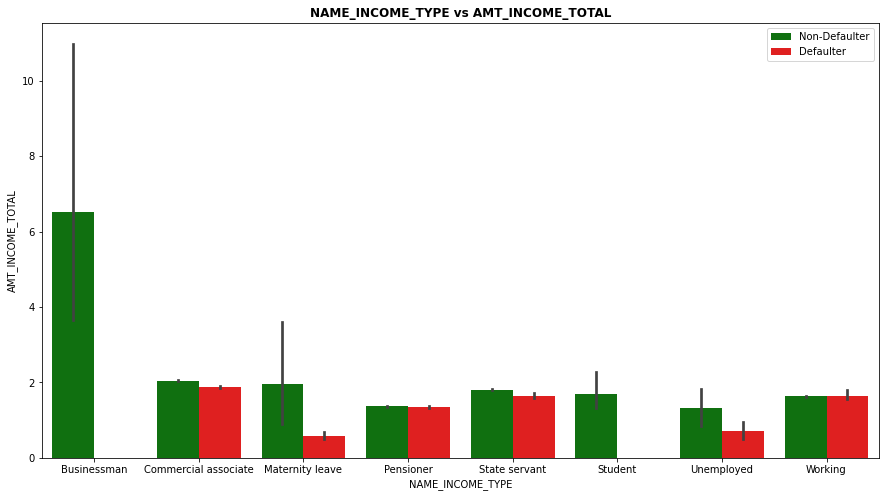

In [77]:
# Income type vs Income Amount Range

bivariate_analysis(application_df,"NAME_INCOME_TYPE","AMT_INCOME_TOTAL")

In [78]:
# # Function for plotting repetitive scatter plot for the numerical columns related to amount
def num_scatter(col1,col2):
    sns.scatterplot(x = col1,y = col2, data=non_defaulter, color = "green", alpha=0.6,s=150, label = "Non_Defaulter")
    sns.scatterplot(x = col1,y = col2, data=defaulter, color = "red", alpha=0.5, s = 100, label="Defaulter")
    plt.title(f"{col1} vs. {col2}",weight="bold")
    plt.legend()
    plt.tight_layout()

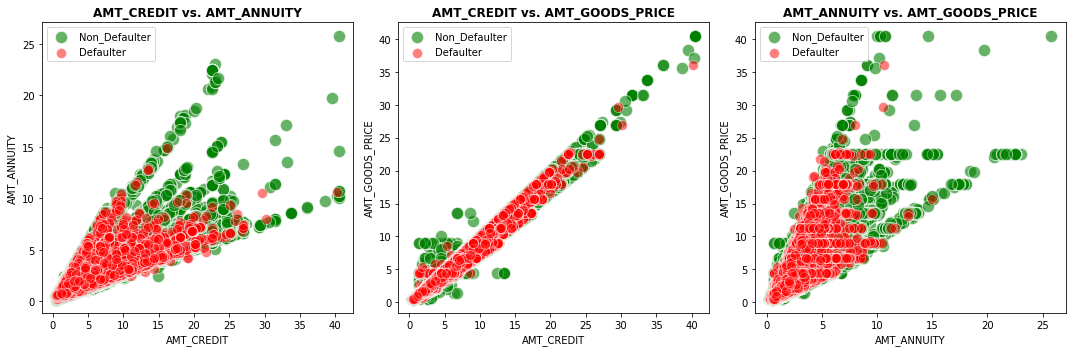

In [79]:
plt.figure(figsize=(15,5))

# 'AMT_CREDIT' Vs. 'AMT_ANNUITY'

plt.subplot(1,3,1)
num_scatter('AMT_CREDIT','AMT_ANNUITY')

# 'AMT_CREDIT' Vs. 'AMT_GOODS_PRICE'

plt.subplot(1,3,2)
num_scatter('AMT_CREDIT','AMT_GOODS_PRICE')

# 'AMT_ANNUITY' Vs. 'AMT_GOODS_PRICE'

plt.subplot(1,3,3)
num_scatter('AMT_ANNUITY','AMT_GOODS_PRICE')

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   
   ###   Summary:
   - <b>Inferences from AMT_INCOME_TYPE Vs. AMOUNT INCOME TOTAL:</b>  
      a. Clients with high income, such as businessmen, have a 0% default rate.  
      b. Clients with low income, less than or equal to 2 lakh, can be either defaulters or non-defaulters.  
        
   - <b>Inferences from Scatter Plots:</b>  
     a. There are very less defaulters for AMT_CREDIT >3M  
     b. AMT_CREDIT and AMT_GOODS_PRICE are highly correlated.  
     c. When amt_annuity >15000 and amt_goods_price> 3M, there is a lesser chance of defaulters
    
   
<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 15. Correlation

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [80]:
# Selecting columns for correlation

corr_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
            'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
            'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE','CNT_FAM_MEMBERS', 
            'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START', 
            'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
            'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE','OBS_30_CNT_SOCIAL_CIRCLE', 
            'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR', 
            'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
            'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE','YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH',
             'YEARS_LAST_PHONE_CHANGE']

# Bifurcating dataset for correlation anaylsis

non_defaulter_df = application_df.loc[application_df['TARGET']==0,corr_cols]
defaulter_df= application_df.loc[application_df['TARGET']==1,corr_cols]

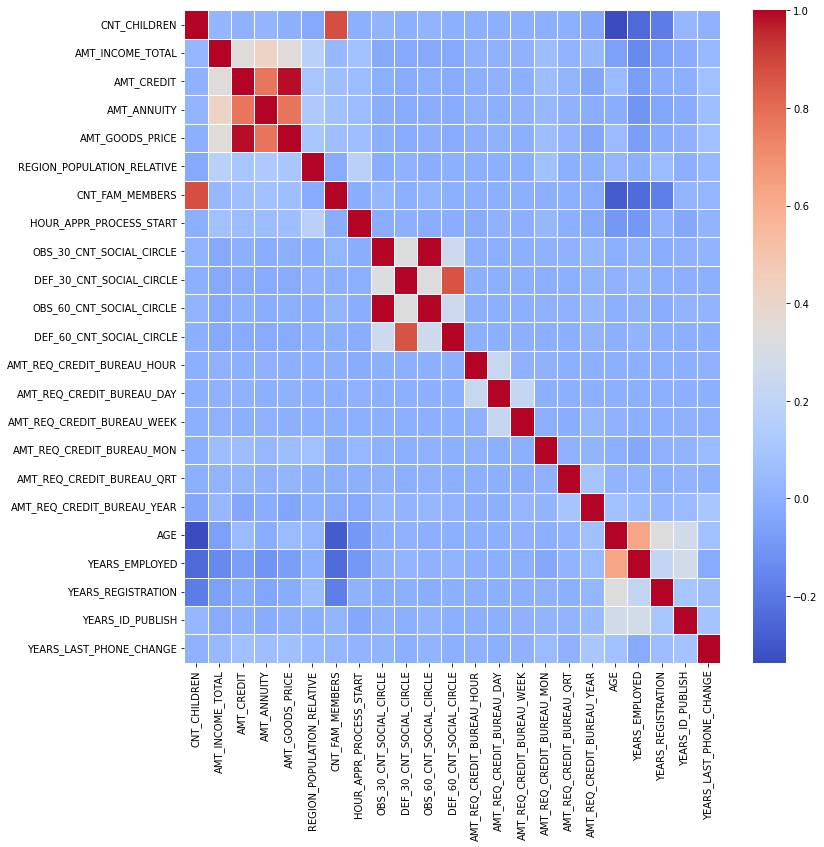

In [81]:
# Plotting heatmap for non-defaulters

plt.figure(figsize=(12,12))
sns.heatmap(non_defaulter_df.corr(), cmap="coolwarm",annot=False,linewidth=1)
plt.show()

In [82]:
# Top 10 correlation for the Non-defaulters

non_defaulter_corr = non_defaulter_df.corr()
non_defaulter_corr = non_defaulter_corr.where(np.triu(np.ones(non_defaulter_corr.shape), k=1).astype(np.bool))
non_defaulter_corr_df = non_defaulter_corr.unstack().reset_index()
non_defaulter_corr_df.columns = ['VAR1', 'VAR2', 'Correlation']
non_defaulter_corr_df.dropna(subset = ['Correlation'], inplace = True)
non_defaulter_corr_df['Correlation'] = round(non_defaulter_corr_df['Correlation'], 2)
non_defaulter_corr_df.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
238,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
94,AMT_GOODS_PRICE,AMT_CREDIT,0.99
138,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
262,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
71,AMT_ANNUITY,AMT_CREDIT,0.77
455,YEARS_EMPLOYED,AGE,0.63
70,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
93,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35
47,AMT_CREDIT,AMT_INCOME_TOTAL,0.34


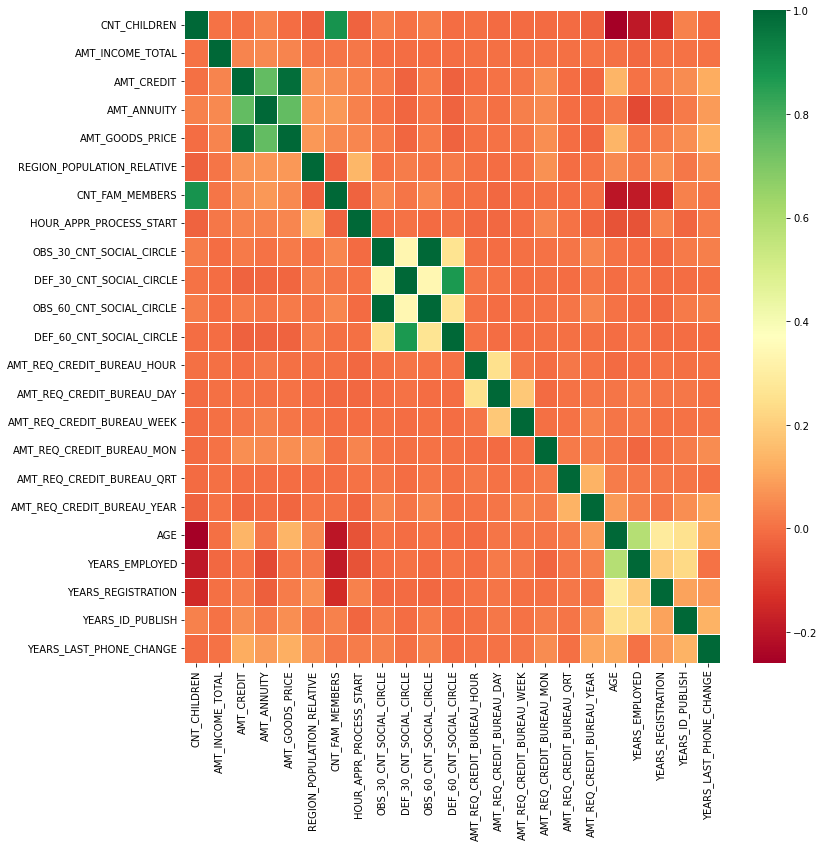

In [83]:
# Plotting heatmap for defaulters

plt.figure(figsize=(12,12))
sns.heatmap(defaulter_df.corr(), cmap="RdYlGn",annot=False,linewidth=1)
plt.show()

In [84]:
# Top 10 correlation for the Defaulters

defaulter_corr = defaulter_df.corr()
defaulter_corr = defaulter_corr.where(np.triu(np.ones(defaulter_corr.shape), k=1).astype(np.bool))
defaulter_corr_df = defaulter_corr.unstack().reset_index()
defaulter_corr_df.columns = ['VAR1', 'VAR2', 'Correlation']
defaulter_corr_df.dropna(subset = ['Correlation'], inplace = True)
defaulter_corr_df['Correlation'] = round(defaulter_corr_df['Correlation'], 2)
defaulter_corr_df.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
238,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
94,AMT_GOODS_PRICE,AMT_CREDIT,0.98
138,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
262,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
71,AMT_ANNUITY,AMT_CREDIT,0.75
455,YEARS_EMPLOYED,AGE,0.58
239,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.34
215,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.33
478,YEARS_REGISTRATION,AGE,0.29


<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   
   ###   Summary:
   - <b>TOP-10 Non-Defaulter Correlation:</b>
	                      VAR1	                    VAR2	     Correlation
                OBS_60_CNT_SOCIAL_CIRCLE	OBS_30_CNT_SOCIAL_CIRCLE	1.00
                AMT_GOODS_PRICE	         AMT_CREDIT	              0.99
                CNT_FAM_MEMBERS	         CNT_CHILDREN	            0.88
                DEF_60_CNT_SOCIAL_CIRCLE	DEF_30_CNT_SOCIAL_CIRCLE	0.86
                AMT_GOODS_PRICE	         AMT_ANNUITY	             0.78
                AMT_ANNUITY	             AMT_CREDIT	              0.77
                YEARS_EMPLOYED	          AGE	                     0.63
                AMT_ANNUITY	             AMT_INCOME_TOTAL	        0.42
                AMT_GOODS_PRICE	         AMT_INCOME_TOTAL	        0.35
                AMT_CREDIT	              AMT_INCOME_TOTAL	        0.34
   - <b>TOP-10 Defaulter Correlation:</b>
   	                      VAR1	                    VAR2	     Correlation  
                OBS_60_CNT_SOCIAL_CIRCLE	OBS_30_CNT_SOCIAL_CIRCLE	1.00  
                AMT_GOODS_PRICE	         AMT_CREDIT	              0.98  
                CNT_FAM_MEMBERS	         CNT_CHILDREN	            0.89  
                DEF_60_CNT_SOCIAL_CIRCLE	DEF_30_CNT_SOCIAL_CIRCLE	0.87  
                AMT_GOODS_PRICE	         AMT_ANNUITY	             0.75  
                AMT_ANNUITY	             AMT_CREDIT	              0.75  
                YEARS_EMPLOYED	          AGE	                     0.58  
                OBS_60_CNT_SOCIAL_CIRCLE	DEF_30_CNT_SOCIAL_CIRCLE	0.34  
                DEF_30_CNT_SOCIAL_CIRCLE	OBS_30_CNT_SOCIAL_CIRCLE	0.33  
                YEARS_REGISTRATION	      AGE	                     0.29
   
<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 16. Reading and Inspecting the Data Frame [previous_application]

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [85]:
# Reading the dataframe

previous_df=pd.read_csv("previous_application.csv")

In [86]:
# Viewing the first five rows of the DataFrame

previous_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# Viewing the last five rows of the DataFrame

previous_df.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,Y,1,NaN,NaN,NaN,XNA,Approved,-1193,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [88]:
# Printing the shape(rows, columns) of the DataFrame

print(previous_df.shape)

(1670214, 37)


In [89]:
# Printing the information about the DataFrame

print(previous_df.info(null_counts=True,verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [90]:
# Statistical summary of the DataFrame

previous_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [91]:
# Checking unique values in each feature

previous_df.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ###   Summary:
   - The data frame contains 37 features and 1670214 rows.  
   The data types of features are as follows:  
     a. 15 features are float64  
     b. 06 features are integer  
     c. 16 features are object
   - There are a lοt οf features with null values but datatypes οf these features lοοks fine.
   - The length of SK ID PREV is 1670214, but the length of SK ID CURR is 338857, which is less than the length of SK ID PREV,  
     indicating that there are duplicate values in SK ID PREV.

<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 17. Missing Value Treatment

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [92]:
# Determining the percentage of Missing Values in the dataframe

nulls=(previous_df.isnull().sum()/len(previous_df)*100).sort_values(ascending = False)
nulls

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [93]:
# Filtering the features having percentage of null values greater than or equal to 40%

null40 = nulls[nulls.values>=40]
null40

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
dtype: float64

In [94]:
# Number of features having percentage of null values greater than or equal to 40

null40.shape[0]

11

In [95]:
# Dropping features having percentage of null values greater than or equal to 40

previous_df.drop(null40.index,axis=1,inplace=True)

In [96]:
# Checking the shape of the dataframe after dropping the features

previous_df.shape

(1670214, 26)

In [97]:
# Determining the percentage of Missing Values in the dataframe after dropping the features

(previous_df.isnull().sum()/len(previous_df)*100).sort_values(ascending = False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

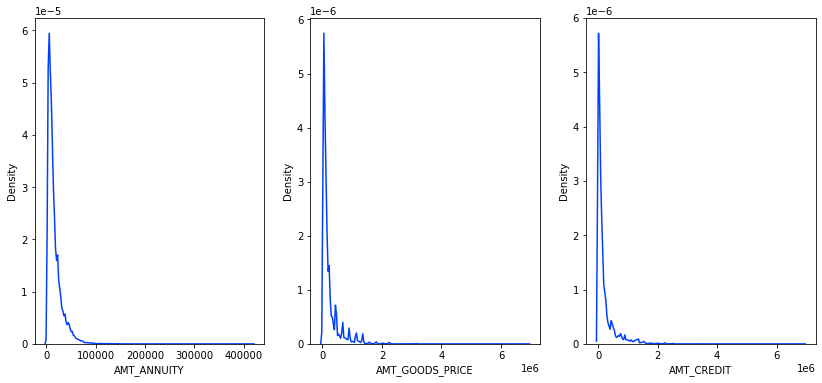

In [98]:
# Analyzing "AMT_ANNUITY","AMT_GOODS_PRICE" and "AMT_CREDIT" for possible dropping/imputation of NaN values

fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(14,6))
sns.kdeplot(ax=ax1, x = "AMT_ANNUITY", data=previous_df)
sns.kdeplot(ax=ax2, x = "AMT_GOODS_PRICE", data=previous_df)
sns.kdeplot(ax=ax3, x = "AMT_CREDIT", data=previous_df)

plt.show()

In [99]:
# Imputing missing values of feature "AMT_ANNUITY" with "Median" as the distribution is heavily skewed because of outliers. 

previous_df['AMT_ANNUITY'].fillna(previous_df["AMT_ANNUITY"].median(), inplace =True)

# Verification:

previous_df['AMT_ANNUITY'].isnull().sum()

0

In [100]:
# Imputing missing values of feature "AMT_GOODS_PRICE" with "Mode" as the distribution is closely similar.

previous_df['AMT_GOODS_PRICE'].fillna(previous_df["AMT_GOODS_PRICE"].mode()[0], inplace =True)

# Verification:

previous_df['AMT_GOODS_PRICE'].isnull().sum()

0

In [101]:
# Imputing missing values of feature "AMT_CREDIT" with "Mode" as the distribution is closely similar.

previous_df['AMT_CREDIT'].fillna(previous_df["AMT_CREDIT"].mode()[0], inplace =True)

# Verification:

previous_df['AMT_CREDIT'].isnull().sum()

0

In [102]:
# Analyzing "CNT_PAYMENT" for possible dropping/imputation of NaN values

previous_df.loc[previous_df['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [103]:
# Imputing CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started

previous_df['CNT_PAYMENT'].fillna(0,inplace = True)

# Verification:

previous_df.CNT_PAYMENT.isnull().sum()

0

In [104]:
# Analyzing "PRODUCT_COMBINATION" for possible dropping/imputation of NaN values

previous_df.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [105]:
# Imputing the NaN values in PRODUCT_COMBINATION feature with "Mode" as NaN values are insignificant in numbers.

previous_df.PRODUCT_COMBINATION.fillna(previous_df.PRODUCT_COMBINATION.mode()[0],inplace=True)

# Verification:

previous_df.PRODUCT_COMBINATION.isnull().sum()

0

In [106]:
# Shape of dataframe after treating the NaN values of all variables

previous_df.shape

(1670214, 26)

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ###   Summary:
   - There are 11 features with Null Value % more than 40%.
   - Dropped the 11 features having high Null Value % by setting a threshold of 40%.
   - Imputed the existing Null values of features "AMT_ANNUITY","AMT_GOODS_PRICE" and "AMT_CREDIT" with median, mode and mode respectively because of the presence of outliers and to preserve the original distribution.
   - Imputed CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started.
   - Imputing the NaN values in PRODUCT_COMBINATION categorical feature with "Mode" as NaN values are insignificant in numbers.
   - The final shape of the "previous_application" dataset stands at <b>(1670214, 26)</b> after dropping/imputing all the Null Values.
   
   
<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 18. Analyzing & Deleting Unnecessary Columns

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [107]:
# Analyzing FLAG_LAST_APPL_PER_CONTRACT:

previous_df.FLAG_LAST_APPL_PER_CONTRACT.value_counts()

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [108]:
# Dropping the feature FLAG_LAST_APPL_PER_CONTRACT as the data is imbalanced:

previous_df.drop(labels="FLAG_LAST_APPL_PER_CONTRACT",axis=1,inplace=True)

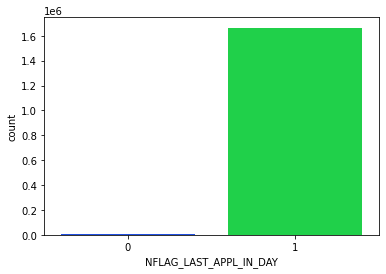

1    1664314
0       5900
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64

In [109]:
# Analyzing NFLAG_LAST_APPL_IN_DAY:

sns.countplot(previous_df.NFLAG_LAST_APPL_IN_DAY)
plt.show()

previous_df.NFLAG_LAST_APPL_IN_DAY.value_counts()

In [110]:
# Dropping the feature NFLAG_LAST_APPL_IN_DAY as the data is imbalanced:

previous_df.drop(labels="NFLAG_LAST_APPL_IN_DAY",axis=1,inplace=True)

In [111]:
# Dropping HOUR_APPR_PROCESS_START as it isn't relevant

previous_df.drop(labels="HOUR_APPR_PROCESS_START",axis=1,inplace=True)

In [112]:
# Inspecting the shape of the data frame after dropping unnecessary features

previous_df.shape

(1670214, 23)

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ###   Summary:
- Dropped the feature FLAG_LAST_APPL_PER_CONTRACT and NFLAG_LAST_APPL_IN_DAY as the data is greatly imbalanced.
- Dropped HOUR_APPR_PROCESS_START as this feature didn’t look relevant.
- The final shape of the “previous_application" dataset after dropping unnecessary features stands at (1670214, 23).   

 <p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 19. Fixing Incorrect/Invalid/Unknown Data Values

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [113]:
# Inspecting Values of all variables

for col in previous_df.columns:
    print(f'Value Counts of {col}:\n {previous_df[col].value_counts()}')
    print("\n")

Value Counts of SK_ID_PREV:
 2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
          ..
2811649    1
1221292    1
2780117    1
2194001    1
2418762    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64


Value Counts of SK_ID_CURR:
 187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: SK_ID_CURR, Length: 338857, dtype: int64


Value Counts of NAME_CONTRACT_TYPE:
 Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64


Value Counts of AMT_ANNUITY:
 11250.000    386209
2250.000      31865
6750.000      13442
9000.000      12496
22500.000     11903
              ...  
3794.445          1
8723.160          1
27948.330         1
25374.285         1
14704.290         1
Name: AMT_ANNUITY, Length: 357959, dtype: int64


Value Counts of AMT_APPLICATION:
 0.00         392402
45000.00      47831
2

In [114]:
#Converting negative days to positive days in "DAYS_DECISION" feature 

previous_df['DAYS_DECISION'] = abs(previous_df['DAYS_DECISION'])

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ###   Summary:
   - Converted values in features 'DAYS_DECISION' from negative to positive as days cannot be negative.
   - Some features have values XAP, XNA in huge numbers. We will continue our analysis without changing these values.  

<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 20. Deriving New Features from Existing Features for Ease of Analysis

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [115]:
previous_df.DAYS_DECISION.value_counts()

245     2444
238     2390
210     2375
273     2350
196     2315
        ... 
2882     163
2922     162
2921     158
2902     148
1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

In [116]:
# Deriving YEARS_DECISION of the applicant from the DAYS_DECISION variable for ease of analysis

previous_df['YEARS_DECISION'] = previous_df['DAYS_DECISION'].apply(lambda x: x//365)

In [117]:
# Dropping existing feature "DAYS_DECISION" after deriving new feature "YEARS_DECISION" from it 

previous_df.drop(labels="DAYS_DECISION",axis=1,inplace=True)

In [118]:
# Checking the percentage share of each value in YEAR_DECISION features

previous_df.YEARS_DECISION.value_counts(normalize=True)*100

0    34.240223
1    23.117636
2    12.875536
3     7.894557
4     6.132508
6     5.810273
7     5.049712
5     4.850337
8     0.029218
Name: YEARS_DECISION, dtype: float64

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ###   Summary:
   - Derived new feature from the existing feature for ease of analysis as follows:  
     a. YEARS_DECISION from DAYS_DECISION feature.  
   - Dropped the existing DAYS_DECISION feature as further analysis will be done on derived features.
   - 34% of loan applicatants have applied for a new loan within 1 year of previous loan decision.
   
<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 21. Identifying and Handling Outliers

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

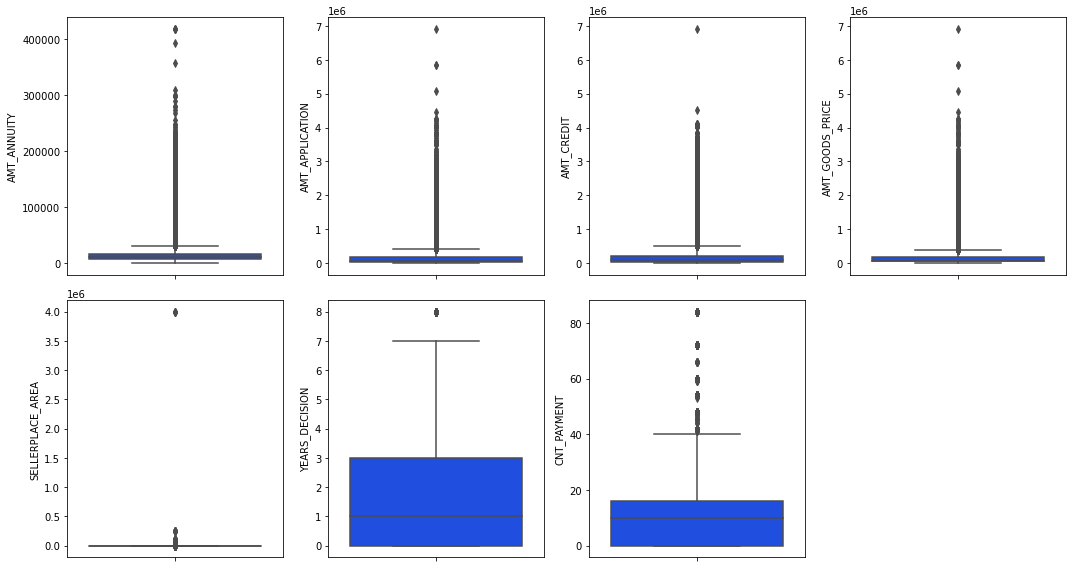

In [119]:
# Identifying the outliers in different numerical variables

outlier_check_prev=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA','YEARS_DECISION',
                    'CNT_PAYMENT']

plt.figure(figsize=(15,8))

for i in enumerate(outlier_check_prev):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=previous_df[i[1]])
    plt.tight_layout()

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">
   
   ###   Summary:
   - AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.
   - CNT_PAYMENT has few outlier values.
   - YEARS_DECISION has few outliers indicating that these previous applications decisions were taken long back.
   
   
<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 22. Data Type Conversion

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [120]:
# Inspecting Data Types of features

previous_df.dtypes

SK_ID_PREV                      int64
SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
AMT_ANNUITY                   float64
AMT_APPLICATION               float64
AMT_CREDIT                    float64
AMT_GOODS_PRICE               float64
WEEKDAY_APPR_PROCESS_START     object
NAME_CASH_LOAN_PURPOSE         object
NAME_CONTRACT_STATUS           object
NAME_PAYMENT_TYPE              object
CODE_REJECT_REASON             object
NAME_CLIENT_TYPE               object
NAME_GOODS_CATEGORY            object
NAME_PORTFOLIO                 object
NAME_PRODUCT_TYPE              object
CHANNEL_TYPE                   object
SELLERPLACE_AREA                int64
NAME_SELLER_INDUSTRY           object
CNT_PAYMENT                   float64
NAME_YIELD_GROUP               object
PRODUCT_COMBINATION            object
YEARS_DECISION                  int64
dtype: object

In [121]:
# Data Type Conversion of Categorical features

cat_cols_prev = ['NAME_CONTRACT_STATUS',"WEEKDAY_APPR_PROCESS_START","NAME_CASH_LOAN_PURPOSE",'NAME_PAYMENT_TYPE',
                 'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE',
                 'CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',"YEARS_DECISION"]

for col in cat_cols_prev:
    previous_df[col] =pd.Categorical(previous_df[col])

In [122]:
# Verification

previous_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START    category
NAME_CASH_LOAN_PURPOSE        category
NAME_CONTRACT_STATUS          category
NAME_PAYMENT_TYPE             category
CODE_REJECT_REASON            category
NAME_CLIENT_TYPE              category
NAME_GOODS_CATEGORY           category
NAME_PORTFOLIO                category
NAME_PRODUCT_TYPE             category
CHANNEL_TYPE                  category
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY          category
CNT_PAYMENT                    float64
NAME_YIELD_GROUP              category
PRODUCT_COMBINATION           category
YEARS_DECISION                category
dtype: object

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ###   Summary:
   - Numeric columns are already in int64 and float64 format. 
   - Converted categorical features to category format.
   
<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 23. Merging & Inspecting Merged Dataframes

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [123]:
# Merging application_df and previous_df on SK_ID_CURR with Inner Join

merged_df = pd.merge(application_df, previous_df, how='inner', on='SK_ID_CURR')

In [124]:
# Viewing the first five rows of the merged DataFrame

merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AGE_RANGE,EMPLOYMENT_YEAR_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE,AMT_ANNUITY_RANGE,YEARS_REGISTRATION_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,YEARS_DECISION
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,2.47005,3.510,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,25,1,9.0,5,3.0,20-30 Years,0-5 Years,200k-300k,400k-500k,300k-400k,20k-30k,5-10 Years,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,XAP,Approved,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,1
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,3.56985,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,3,3.0,0,2.0,40-50 Years,0-5 Years,200k-300k,Above 1M,Above 1M,30k-40k,0-5 Years,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,XNA,Approved,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,2
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,3.56985,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,3,3.0,0,2.0,40-50 Years,0-5 Years,200k-300k,Above 1M,Above 1M,30k-40k,0-5 Years,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,XAP,Approved,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,2
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,3.56985,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,3,3.0,0,2.0,40-50 Years,0-5 Years,200k-300k,Above 1M,Above 1M,30k-40k,0-5 Years,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,XAP,Approved,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,6
4,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,0.67500,1.350,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,0,11.0,6,2.0,Above 50 Years,NaN,0-100K,100K-200K,100K-200K,0-10K,10-20 Years,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,XAP,Approved,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,2


In [125]:
# Viewing the last five rows of the merged DataFrame

merged_df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AGE_RANGE,EMPLOYMENT_YEAR_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE,AMT_ANNUITY_RANGE,YEARS_REGISTRATION_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,YEARS_DECISION
1413696,456255,0,Cash loans,F,N,N,0,1.575,6.75,4.91175,6.75,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.04622,Laborers,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,46,3,14.0,1,2.0,40-50 Years,0-5 Years,100K-200K,600k-700k,600k-700k,40k-50k,10-20 Years,2073384,Cash loans,16400.610,229500.0,254340.0,229500.0,THURSDAY,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,middle,Cash X-Sell: middle,1
1413697,456255,0,Cash loans,F,N,N,0,1.575,6.75,4.91175,6.75,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.04622,Laborers,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,46,3,14.0,1,2.0,40-50 Years,0-5 Years,100K-200K,600k-700k,600k-700k,40k-50k,10-20 Years,1708056,Revolving loans,2250.000,45000.0,45000.0,45000.0,SUNDAY,XAP,Refused,XNA,HC,Repeater,XNA,Cards,walk-in,Country-wide,20,Connectivity,0.0,XNA,Card Street,1
1413698,456255,0,Cash loans,F,N,N,0,1.575,6.75,4.91175,6.75,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.04622,Laborers,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,46,3,14.0,1,2.0,40-50 Years,0-5 Years,100K-200K,600k-700k,600k-700k,40k-50k,10-20 Years,1296007,Cash loans,30737.655,765000.0,1067940.0,765000.0,FRIDAY,Repairs,Refused,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_normal,Cash Street: low,0
1413699,456255,0,Cash loans,F,N,N,0,1.575,6.75,4.91175,6.75,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.04622,Laborers,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,46,3,14.0,1,2.0,40-50 Years,0-5 Years,100K-200K,600k-700k,600k-700k,40k-50k,10-20 Years,2631384,Cash loans,54022.140,1170000.0,1271929.5,1170000.0,FRIDAY,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,2
1413700,456255,0,Cash loans,F,N,N,0,1.575,6.75,4.91175,6.75,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.04622,Laborers,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,46,3,14.0,1,2.0,40-50 Years,0-5 Years,100K-200K,600k-700k,600k-700k,40k-50k,10-20 Years,2729207,Consumer loans,11514.555,58225.5,58545.0,58225.5,FRIDAY,XAP,Approved,Cash through the bank,XAP,Repeater,Computers,POS,XNA,Country

In [126]:
# Printing the shape(rows, columns) of the merged DataFrame

print(merged_df.shape)

(1413701, 74)


In [127]:
# Printing the information about the merged DataFrame

print(merged_df.info(null_counts=True,verbose=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 74 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413701 non-null  int64   
 1   TARGET                        1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  category
 3   CODE_GENDER                   1413701 non-null  category
 4   FLAG_OWN_CAR                  1413701 non-null  category
 5   FLAG_OWN_REALTY               1413701 non-null  category
 6   CNT_CHILDREN                  1413701 non-null  int64   
 7   AMT_INCOME_TOTAL              1413701 non-null  float64 
 8   AMT_CREDIT_x                  1413701 non-null  float64 
 9   AMT_ANNUITY_x                 1413701 non-null  float64 
 10  AMT_GOODS_PRICE_x             1413701 non-null  float64 
 11  NAME_TYPE_SUITE               1413701 non-null  category
 12  NAME_INCOME_TY

In [128]:
# Statistical summary of the merged DataFrame

merged_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+00,5.875537e+00,2.701688e+00,5.276522e+00,2.074985e-02,2.150501e+00,1.198433e+01,1.540740e+00,1.537008e-01,1.522906e+00,1.078021e-01,5.484894e-03,6.028149e-03,3.410198e-02,2.664913e-01,3.196935e-01,2.691239e+00,4.421384e+01,1.985500e+02,1.321683e+01,7.823753e+00,2.535789e+00,1.922744e+06,1.484032e+04,1.752436e+05,1.963539e+05,1.854396e+05,3.149878e+02,1.256367e+01
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+00,3.849173e+00,1.395072e+00,3.531028e+00,1.334702e-02,9.006787e-01,3.232181e+00,2.528944e+00,4.654353e-01,2.507192e+00,3.786711e-01,7.702591e-02,1.001966e-01,2.012902e-01,9.268428e-01,8.781444e-01,2.157176e+00,1.190217e+01,3.926378e+02,9.725399e+00,4.129233e+00,2.135930e+00,5.327153e+05,1.316370e+04,2.936222e+05,3.194812e+05,2.881244e+05,7.695082e+03,1.448807e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e-01,4.500000e-01,1.615500e-01,4.050000e-01,2.900000e-04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
25%,1.893640e+05,0.000000e+00,0.000000e+00,1.125000e+00,2.700000e+00,1.682100e+00,2.385000e+00,1.003200e-02,2.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.400000e+01,2.000000e+00,5.000000e+00,4.000000e+00,1.000000e+00,1.461346e+06,7.406055e+03,1.975050e+04,2.488050e+04,4.500000e+04,-1.000000e+00,0.000000e+00
50%,2.789920e+05,0.000000e+00,0.000000e+00,1.575000e+00,5.084955e+00,2.492550e+00,4.500000e+00,1.885000e-02,2.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,4.300000e+01,6.000000e+00,1.200000e+01,9.000000e+00,2.000000e+00,1.922698e+06,1.125000e+04,7.087050e+04,8.059500e+04,7.087500e+04,4.000000e+00,1.000000e+01
75%,3.675560e+05,0.000000e+00,1.000000e+00,2.070000e+00,8.079840e+00,3.454200e+00,6.795000e+00,2.866300e-02,3.000000e+00,1.400000e+01,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,5.400000e+01,1.700000e+01,2.000000e+01,1.100000e+01,4.000000e+00,2.384012e+06,1.674797e+04,1.800000e+05,2.156400e+05,1.800000e+05,8.500000e+01,1.800000e+01
max,4.562550e+05,1.000000e+00,1.900000e+01,1.170000e+03,4.050000e+01,2.250000e+01,4.050000e+01,7.250800e-02,2.000000e+01,2.300000e+01,3.480000e+02,3.400000e+01,3.440000e+02,2.400000e+01,4.000000e+00,9.000000e+00,8.000000e+00,2.700000e+01,2.610000e+02,2.500000e+01,6.900000e+01,1.000000e+03,6.700000e+01,1.900000e+01,1.100000e+01,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,4.000000e+06,8.400000e+01


<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 24. Univariate and Segmented Univariate Analysis on Merged DataFrame

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

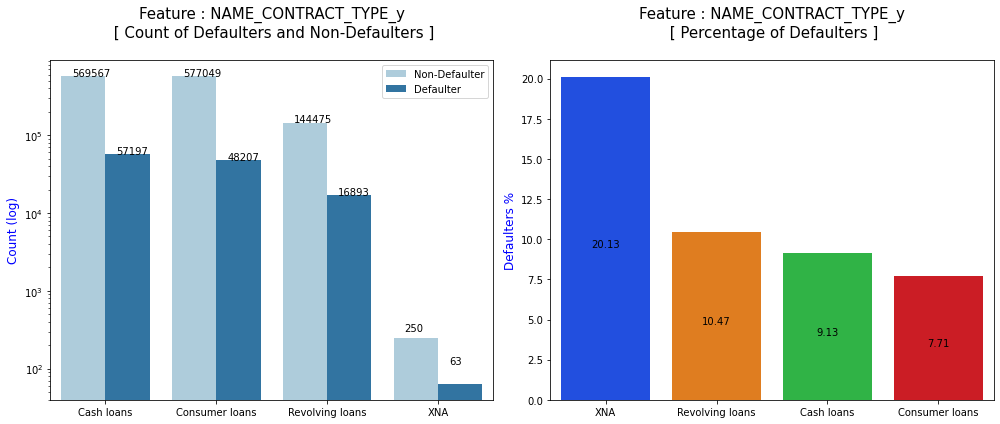

-----------------------------------------------------------------------------------------------------------------------------


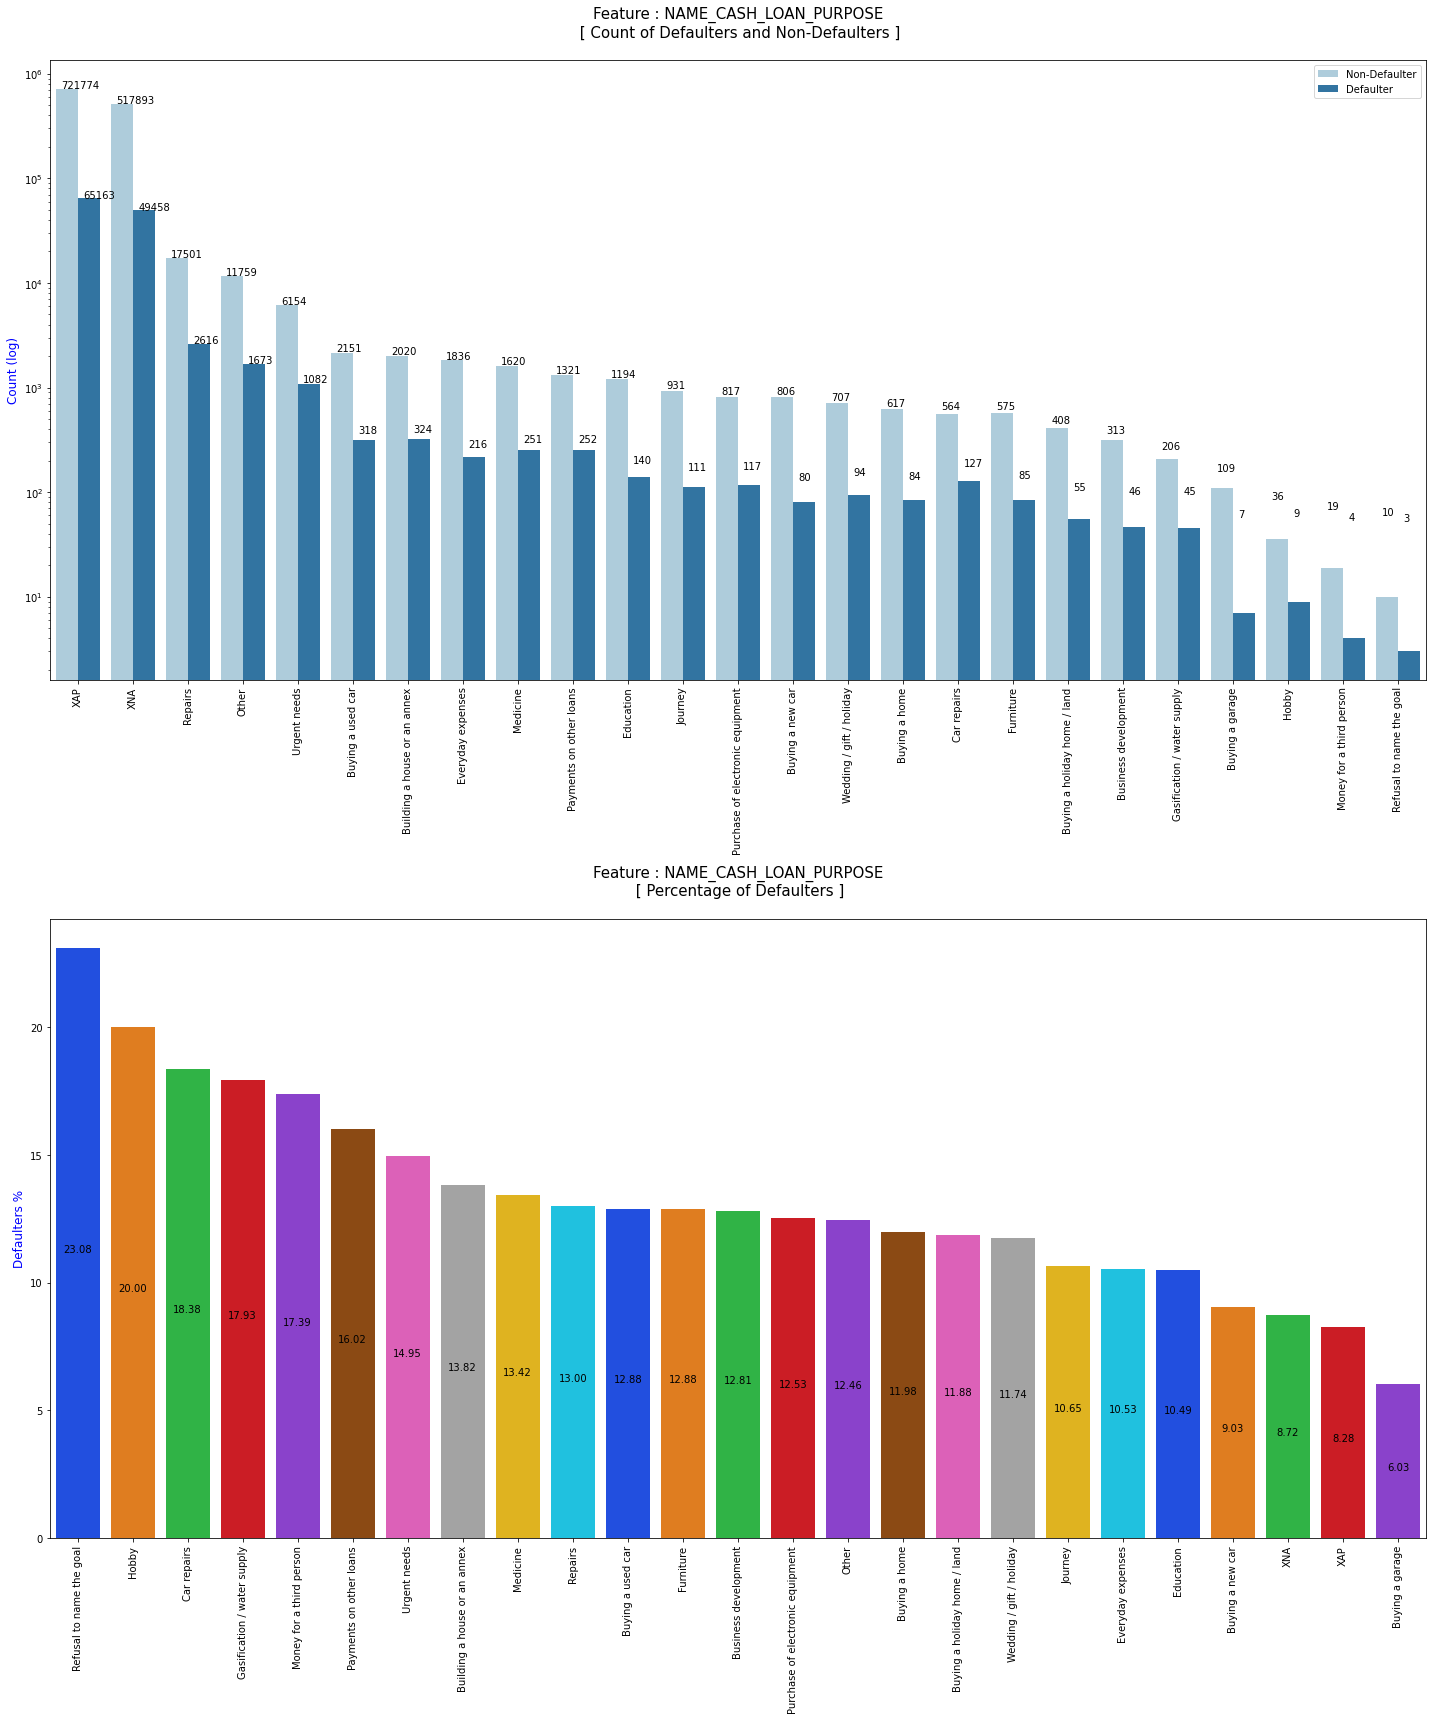

-----------------------------------------------------------------------------------------------------------------------------


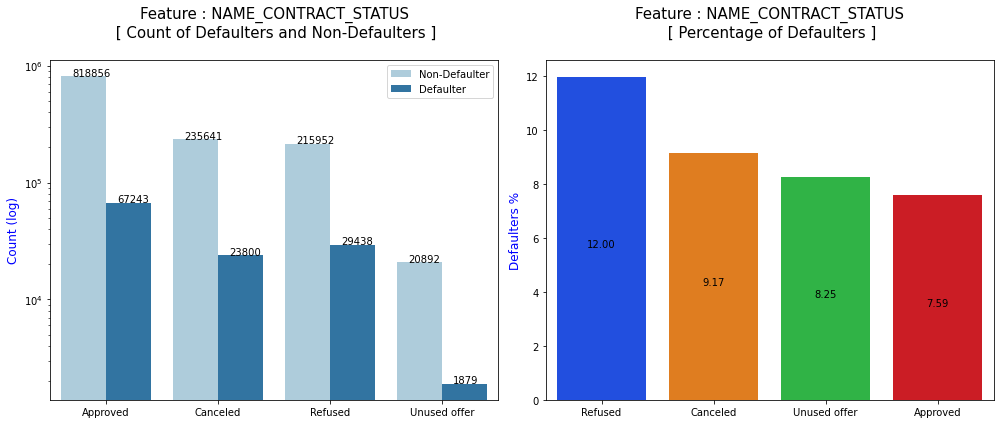

-----------------------------------------------------------------------------------------------------------------------------


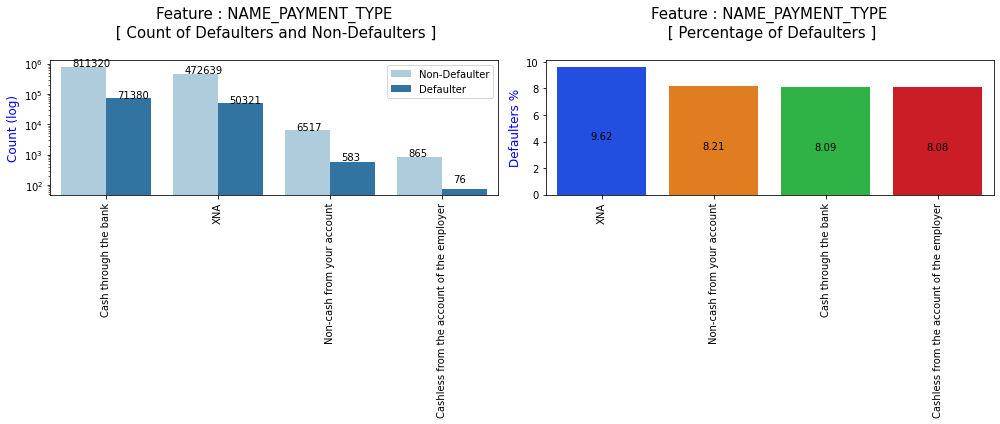

-----------------------------------------------------------------------------------------------------------------------------


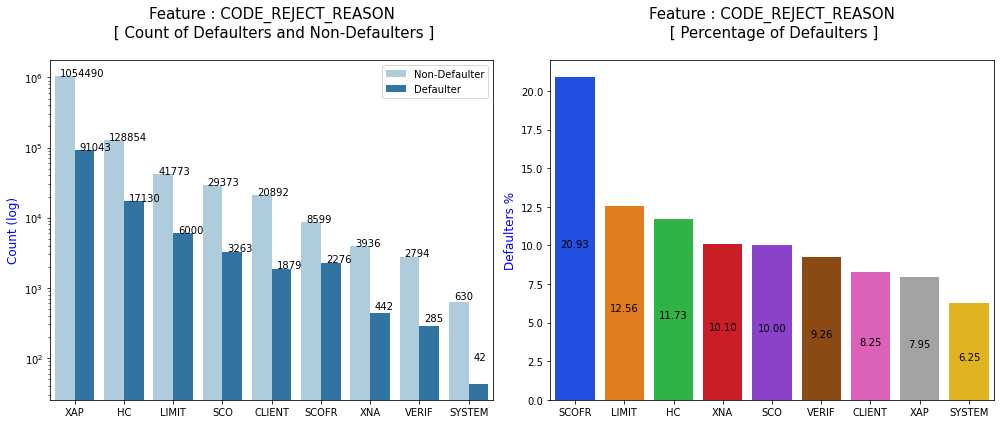

-----------------------------------------------------------------------------------------------------------------------------


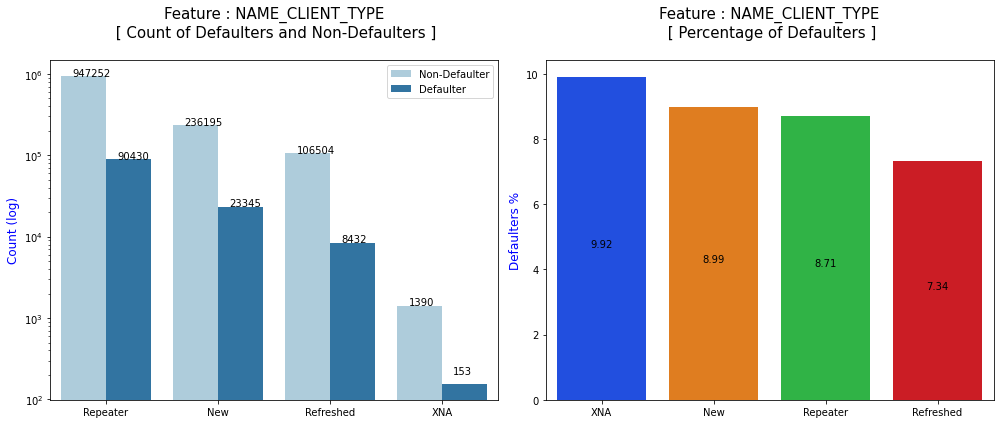

-----------------------------------------------------------------------------------------------------------------------------


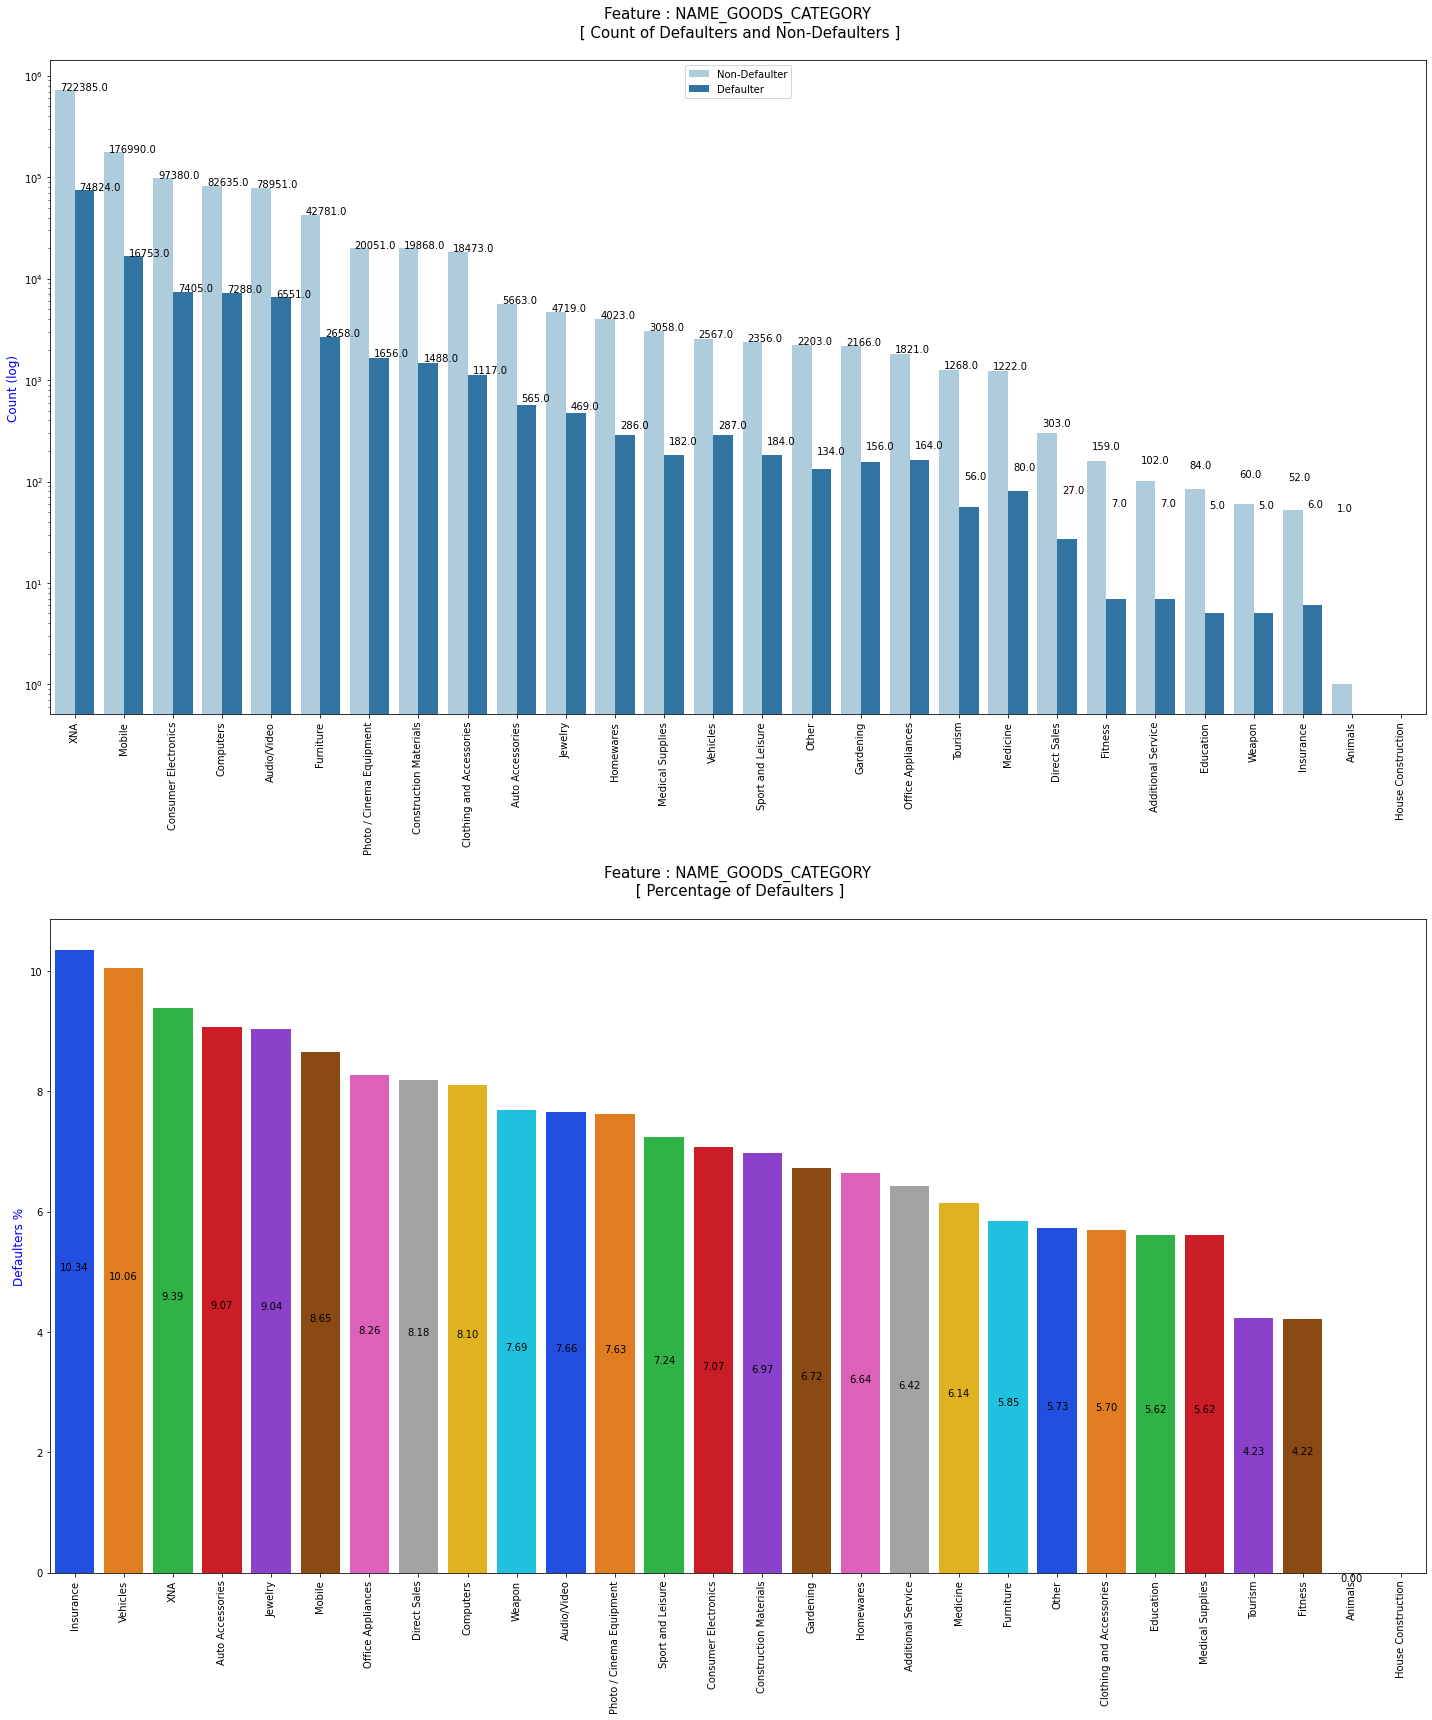

-----------------------------------------------------------------------------------------------------------------------------


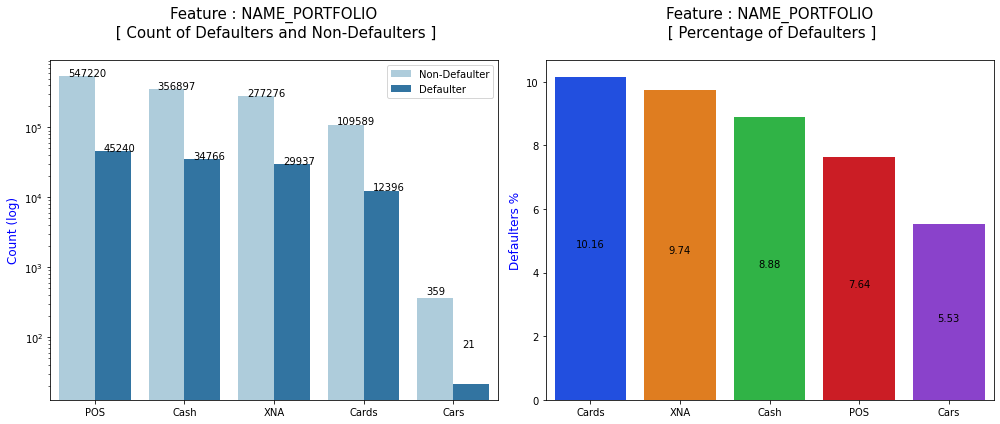

-----------------------------------------------------------------------------------------------------------------------------


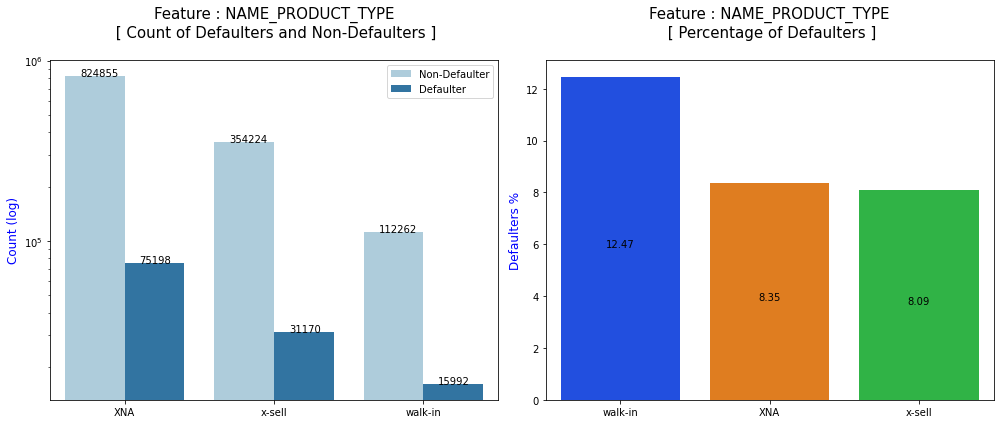

-----------------------------------------------------------------------------------------------------------------------------


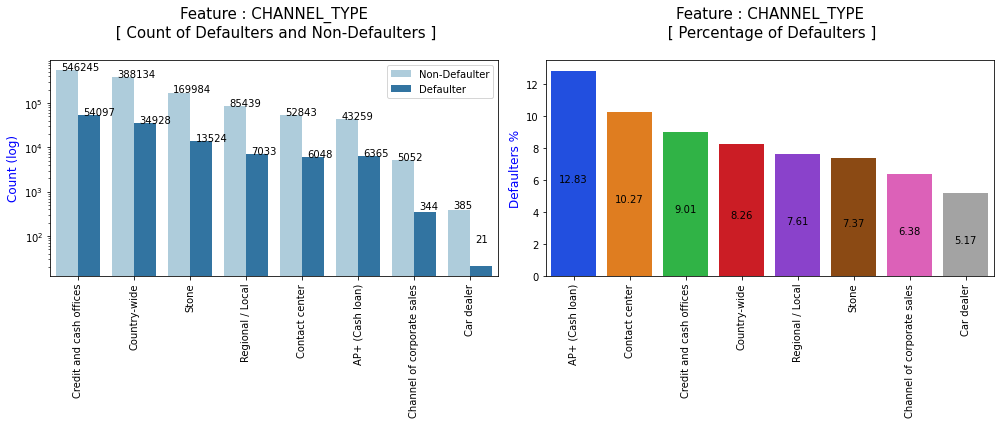

-----------------------------------------------------------------------------------------------------------------------------


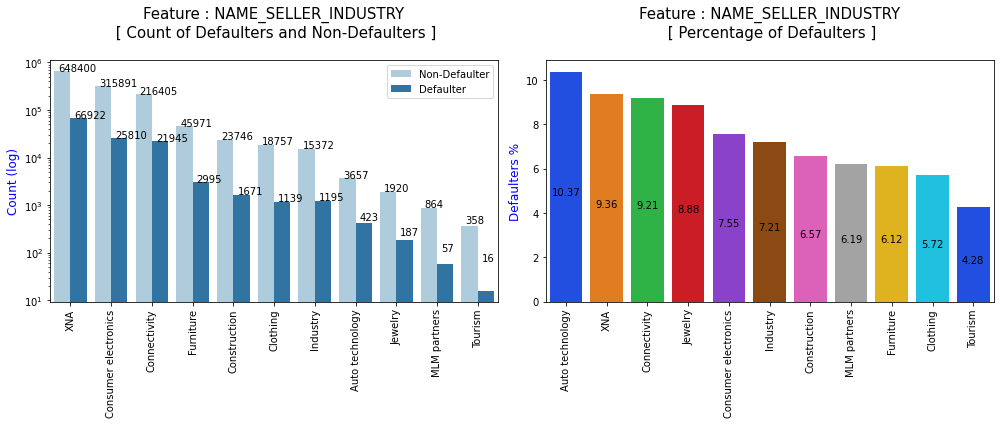

-----------------------------------------------------------------------------------------------------------------------------


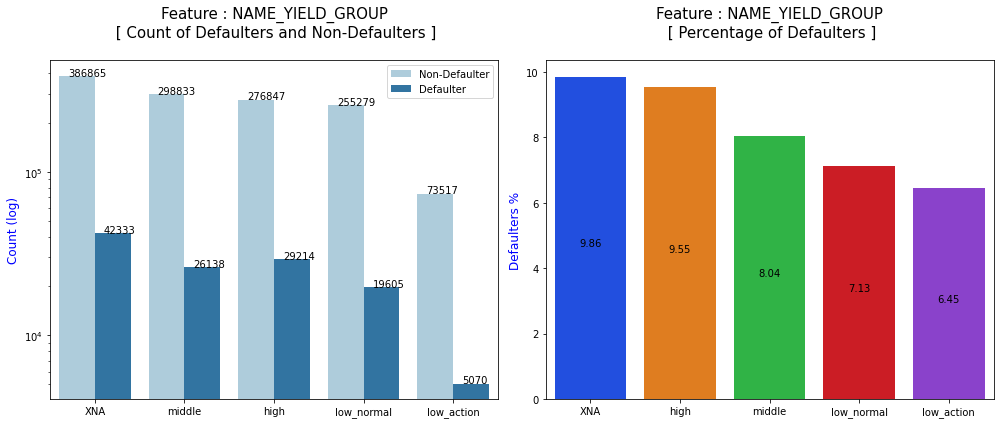

-----------------------------------------------------------------------------------------------------------------------------


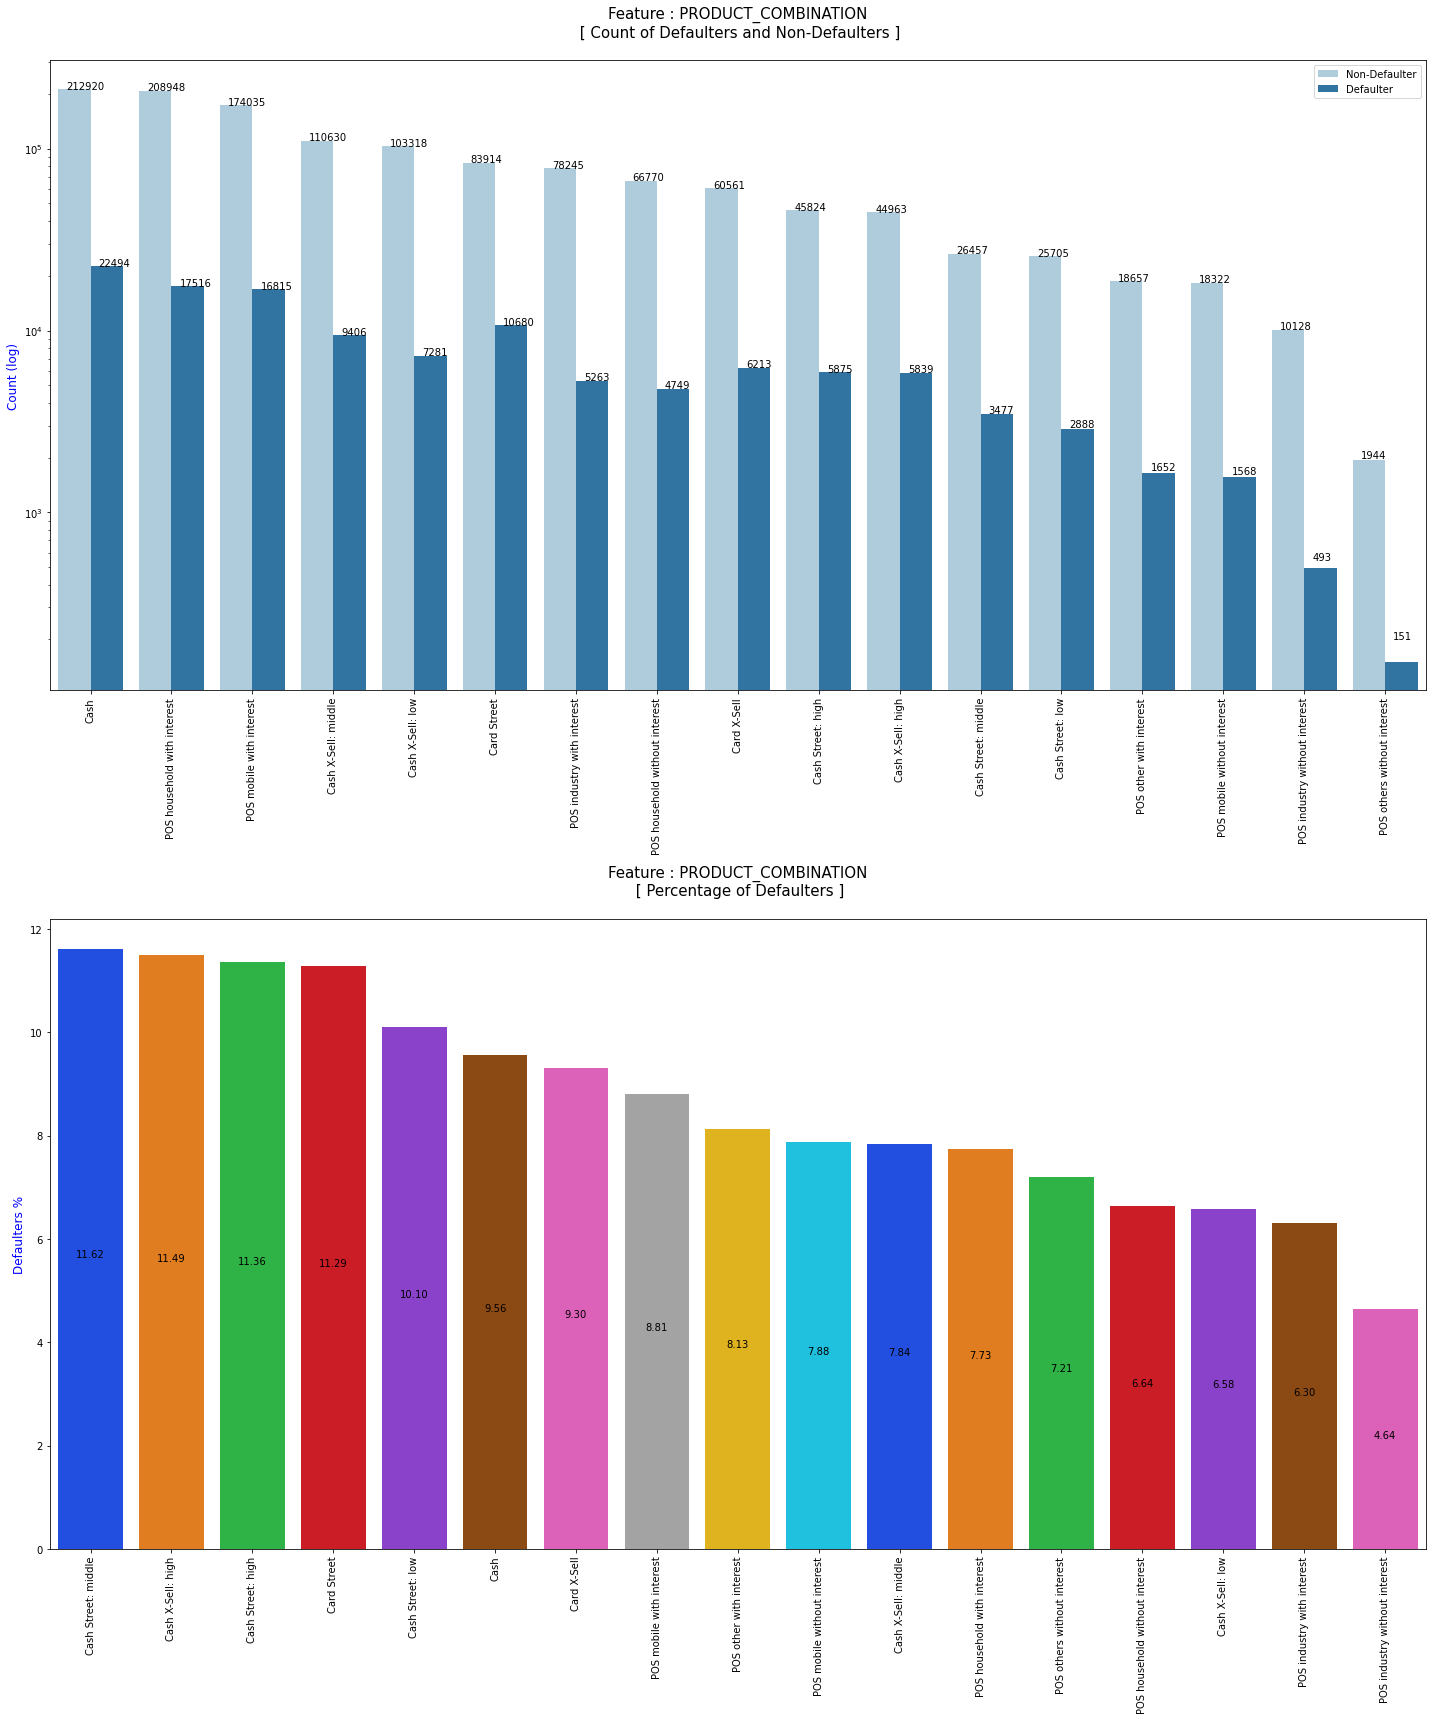

-----------------------------------------------------------------------------------------------------------------------------


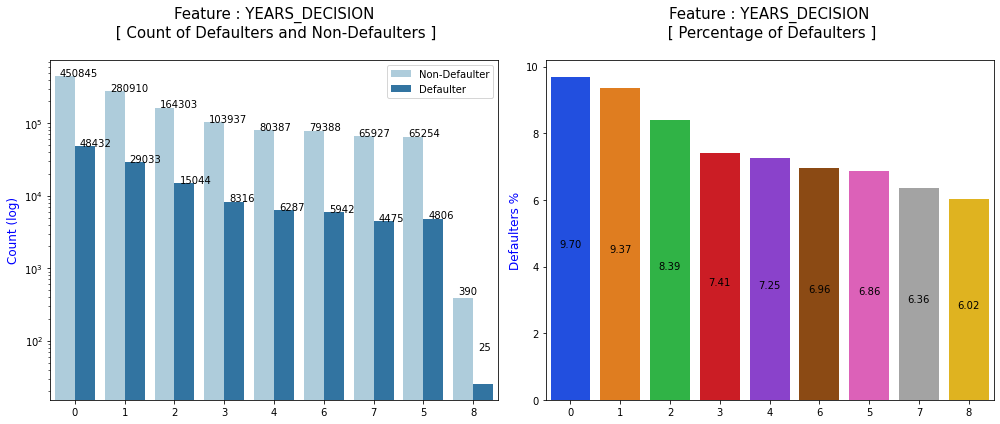

-----------------------------------------------------------------------------------------------------------------------------


In [129]:
merged_uni_col=['NAME_CONTRACT_TYPE_y','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 
                'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO','NAME_PRODUCT_TYPE', 
                'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'YEARS_DECISION']
for col in merged_uni_col:
    if col in ["NAME_PAYMENT_TYPE",'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY']:
        univariate_segmented(merged_df,col,True,True)
    elif col in ["NAME_CASH_LOAN_PURPOSE",'NAME_GOODS_CATEGORY','PRODUCT_COMBINATION']:
        univariate_segmented(merged_df,col,True,False)
    else:
        univariate_segmented(merged_df,col)

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   
   ###   Summary:
   - <b>NAME_CONTRACT_TYPE_y</b>
               > Highest number of loans are applied for Consumer Loans.    
               > Deaulter percentage is highest for XNA(Unknown values) followed by Revolving Loans.
   - <b>NAME_CASH_LOAN_PURPOSE</b>  
               > Loan purpose has high number of unknown values (XAP, XNA) 
               > Defaulter percentage is highest for the people who refuse to name the purpose of cash loan.
               > Loan taken for "Home" and for "Holiday home/land" have lowest default rate.
   - <b>NAME_CONTRACT STATUS</b>  
               > 90% of the previously cancelled client have repayed the loan.
               > 88% of the clients who have been previously refused a loan have payed back the loan 
                 in current case.
               > 7% of the previously approved loan applicants that defaulted in current loan.
   - <b>NAME_PAYMENT_TYPE</b>  
               > 'Cash through the bank' is the most frequently used payment method.
               > Unknown value (XNA) has the highest default rate.
   - <b>CODE_REJECT_REASON</b>  
               > 'SCO', 'LIMIT' and 'HC' are the most common reason of rejection after Unknown Value(XAP).
               >  Defaulter percentage is highest for the code 'SCOFR'.
   - <b>NAME_CLIENT_TYPE</b>  
               > Most of the applicants are Repeater.
               > Both New and Repeater have somewhat equal share of default rate after Unknown Value(XNA). 
   - <b>NAME_GOODS_CATEGORY</b>  
               > Most of the applicants have applied loan for Mobile and Consumer Electronics after Unknown  
                 Value(XNA). 
               > Highest percentage of default cases are for the applicants who previously applied loan for 
                 Insurance and Vehicles.
   - <b>NAME_PORTFOLIO</b>  
               > Most of the previous applications were for POS followed by cash.
               > For Cards defaulter rate is highest.
   - <b>NAME_PRODUCT_TYPE</b>  
               > It has high number of Unknown Values(XNA).
               > Most of the previous applications were x-sell.
               > Default rate is high where the previous application was walk-in.               
   - <b>CHANNEL_TYPE</b>
               > Most of the clients were acquired from Credit and cash offices.
               > Clients acquired through AP+ (Cash Loan) Channel have the highest default rate.
   - <b>NAME_SELLER_INDUSTRY</b>
               > For most of the applicants the seller industry is Consumer Electronics after Unknown  
                 Value(XNA).
               > In Seller Industry "Auto technology" has highest rate of defaulter.
               > Tourism Seller Industry has lowest number of defaulters
   - <b>NAME_YIELD_GROUP</b>
               > For most of the applicants interest rate of the previous application is Unknown(XNA),
                 followed by Middle. 
               > Defaulter percentage is highest for the applicants whose interest rate of the previous 
                 application is Unknown(XNA) followed by high.  
   - <b>PRODUCT_COMBINATION</b>
               > There are more clients for Cash in detailed product combination of the previous 
                 application.
               > Defaulter percentage is highest for Cash Street-Middle.
   - <b>DAYS_DECISION</b>
               > Most of the applicants have applied for a new loan within 1 year of previous 
                 loan decision.
               > They also tend to have highest default rate.
               
<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 25. Bivariate Analysis on Merged DataFrame

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

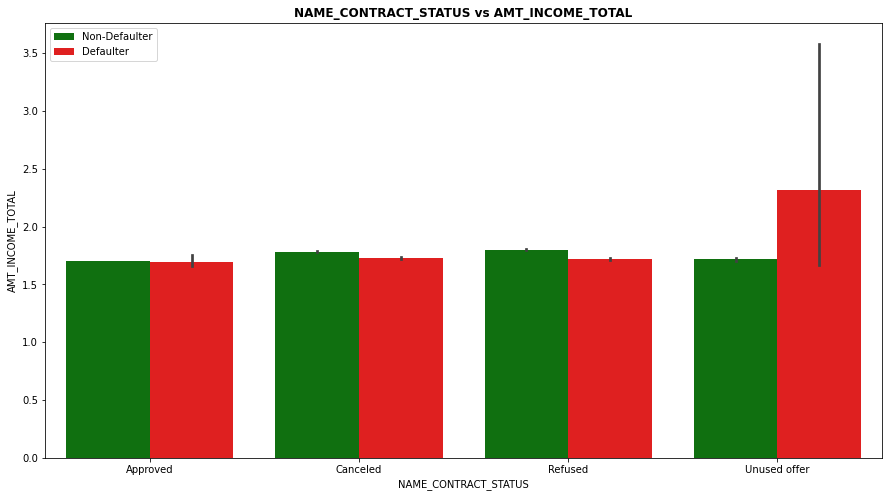

In [130]:
# NAME_CONTRACT_STATUS vs AMT_INCOME_TOTAL

bivariate_analysis(merged_df,"NAME_CONTRACT_STATUS","AMT_INCOME_TOTAL")

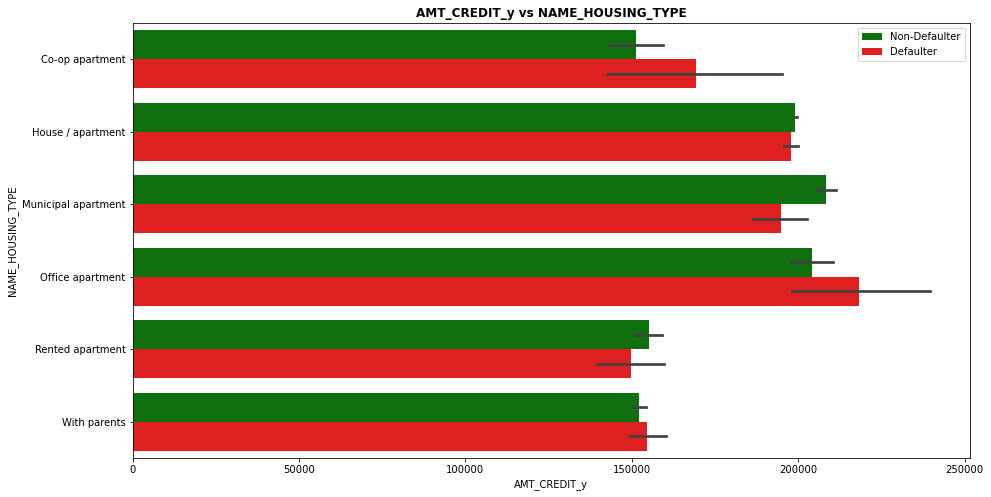

In [131]:
# Credit AMT_CREDIT_y vs. NAME_HOUSING_TYPE

bivariate_analysis(merged_df,"AMT_CREDIT_y","NAME_HOUSING_TYPE")

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#66FF99;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   
   ###   Summary:
   - <b>"NAME_CONTRACT_STATUS" Vs. "AMT_INCOME_TOTAL"</b>
               > CLients who have not used offer earlier have defaulted even when there average income is 
                 higher than others.    
   - <b>"AMT_CREDIT_y" Vs. "NAME_HOUSING_TYPE"</b>  
               > "Office apartment" category has the higher credit as compared to others. 
               
<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<hr>
<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFFF00;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

## 26. Conclusions

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

#### After analysing the datasets, there are a few characteristics of a client that the bank can use to determine whether or not they will repay the loan.  
#### The analysis is comprised of the following factors and categorization:

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#B7FFBF
           ;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   
   ###   Decisive Factors whether a Client will be Non-Defaulter:  
   <b>- NAME_CONTRACT_TYPE:</b>                             Client applying for Revolving Loans.  
   <b>- CODE_GENDER:</b> 	     Female clients  
    <b>- NAME_INCOME_TYPE:</b> 	     Clients who are student or businessmen  
    <b>- NAME_EDUCATION_TYPE:</b>      Clients having academic degree.	  
    <b>- REGION_FAMILY_STATUS:</b>	     Clients who are either married or widow  
    <b>- NAME_HOUSING_TYPE:</b>	     Clients living in office apartments  
    <b>- OCCUPATION_TYPE:</b>	     Clients who are accountants  
    <b>- REGION_RATING_CLIENT:</b>       Clients with Rating 1  
    <b>- ORGANIZATION TYPE:</b>	     Trade type-4 and Industry type-12  
    <b>- DAYS_BIRTH:</b>		     Clients above 50 years of age  
    <b>- DAYS_EMPLOYED:</b>	     Clients with work-ex of 40-50 years  
    <b>- AMT_INCOME_TOTAL:</b>	     Clients with income range in 700k-800k  
    <b>- AMT_GOODS_PRICE:</b> 	     Goods price range above 1M  
    <b>- AMT_ANNUITY RANGE:</b>	     Clients having annuity above 100k  
    <b>- CNT_CHILDREN:</b>	     Clients having no children  
    <b>- CASH_LOAN_PURPOSE:</b>           For buying a garage  
    <b>- NAME_CLIENT_TYPE:</b>	     Refreshed clients

               
<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFCCCB
           ;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   
   ###   Decisive Factors whether a Client will be Defaulter:  
   <b>- NAME_CONTRACT_TYPE:</b>    Client applying for Cash Loans.  
    <b>- CODE_GENDER:</b> 	     Male clients  
    <b>- NAME_INCOME_TYPE: </b>	     Clients on maternity leave or unemployed  
    <b>- NAME_EDUCATION_TYPE:   </b>	   Clients having lower secondary education	  
    <b>- NAME_FAMILY_STATUS:	     </b>	Single or Civil Marriage clients  
    <b>- NAME_HOUSING_TYPE:	</b>	     Clients living in rented apartments or with parents  
    <b>- OCCUPATION_TYPE:	  </b>	   Clients who are Low-skill labourers  
    <b>- REGION_RATING_CLIENT:    </b>	   Clients with Rating 3  
    <b>- ORGANIZATION TYPE:	 </b>	    Transport type-3 and Industry type-13  
    <b>- DAYS_BIRTH:</b>			     Clients between 20-30 years of age  
    <b>- DAYS_EMPLOYED:</b>		     Clients with work-ex of 0-5 years  
    <b>- AMT_INCOME_TOTAL:</b>		     Clients with income range in 0-300k  
    <b>- AMT_GOODS_PRICE: </b>		     Goods price range between 300k-500k  
    <b>- AMT_ANNUITY RANGE:</b>		     Clients having annuity between 20k-40k  
    <b>- CNT_CHILDREN:</b>		     Clients having more children  
    <b>- CASH_LOAN_PURPOSE:</b>	           For hobby and car repairs  
    <b>- NAME_CLIENT_TYPE:</b>		     New and repeater clients
              
<p style="padding: 0.05px;
              color:white;">
</p>
</div>